# Enterprise Data Science Bootcamp Project
### Enterprise Data Science & Analytics 2025

---

### Team Members:
- **Daniel Almeida** (20241154)
- **Gonçalo Dias** (20240819)
- **Miguel Almeida** (20241151)

In [1]:
%run ../utils/configuration.ipynb

In [2]:
import sys
import polars as pl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [4]:
try:
    df = pl.read_parquet(train_path)
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


<a class="anchor" id="1st-bullet">
# 1. Data Collection and Initial Processing & Exploratory Data Analysis
</a>

In [5]:
df.shape

(5634, 50)

In [6]:
#df.index

In [7]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64


In [8]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [9]:
df.describe()

statistic,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,f64
"""count""","""5634""","""5634""",5634.0,5634.0,"""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,"""5634""",5634.0,0.0,5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""",5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""","""5634""",5634.0,5634.0,5634.0,"""5634""","""5634""",5634.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,5634.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,1.963614,32.478346,null,null,22.901743,null,null,null,20.475861,null,null,null,null,null,null,null,null,null,null,null,65.02476,2296.119886,1.929315,6.966631,746.839917,3047.997119,null,46.648917,null,0.162229,0.485091,0.465921,null,93491.340433,null,36.205909,-119.760068,1.0,null,3.243166,null,null,0.266773,58.507987,4408.709265,null,null,22150.773518
"""std""",null,null,3.009056,24.719552,null,null,15.37981,null,null,null,20.293161,null,null,null,null,null,null,null,null,null,null,null,29.96502,2284.728316,7.839365,25.24884,849.17087,2886.879685,null,16.742776,null,0.368694,0.499822,0.953188,null,1859.366159,null,2.480959,2.1665,0.0,null,1.202907,null,null,0.442312,21.153275,1185.606739,null,null,21015.147632
"""min""","""0002-ORFBO""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""No""","""Cable""",0.0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-Month""","""No""","""Bank Withdrawal""",18.25,18.8,0.0,0.0,0.0,21.36,"""Female""",19.0,null,0.0,0.0,0.0,"""Acampo""",90001.0,"""32.555828, -117.040073""",32.555828,-124.301372,1.0,"""Q3""",1.0,"""Churned""","""No""",0.0,5.0,2003.0,"""Attitude""","""Attitude of service provider""",11.0
"""25%""",null,null,0.0,9.0,null,null,9.22,null,null,null,4.0,null,null,null,null,null,null,null,null,null,null,null,36.25,398.55,0.0,0.0,70.65,600.9,null,32.0,null,0.0,0.0,0.0,null,92103.0,null,33.988572,-121.809955,1.0,null,3.0,null,null,0.0,41.0,3474.0,null,null,2379.0
"""50%""",null,null,0.0,29.0,null,null,22.78,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,70.5,1393.6,0.0,0.0,394.8,2104.0,null,46.0,null,0.0,0.0,0.0,null,93518.0,null,36.220761,-119.642281,1.0,null,3.0,null,null,0.0,61.0,4539.0,null,null,17782.0
"""75%""",null,null,3.0,56.0,null,null,36.24,null,null,null,27.0,null,null,null,null,null,null,null,null,null,null,null,89.8,3865.6,0.0,0.0,1187.76,4887.36,null,60.0,null,0.0,1.0,0.0,null,95335.0,null,38.196497,-117.967399,1.0,null,4.0,null,null,1.0,75.0,5393.0,null,null,36125.0
"""max""","""9995-HOTOH""","""Yes""",11.0,72.0,"""Offer E""","""Yes""",49.98,"""Yes""","""Yes""","""None""",85.0,"""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Mailed Check""",118.7

In [10]:
df.schema

Schema([('customer_id', String),
        ('referred_a_friend', String),
        ('number_of_referrals', Int64),
        ('tenure_in_months', Int64),
        ('offer', String),
        ('phone_service', String),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', String),
        ('internet_service', String),
        ('internet_type', String),
        ('avg_monthly_gb_download', Int64),
        ('online_security', String),
        ('online_backup', String),
        ('device_protection_plan', String),
        ('premium_tech_support', String),
        ('streaming_tv', String),
        ('streaming_movies', String),
        ('streaming_music', String),
        ('unlimited_data', String),
        ('contract', String),
        ('paperless_billing', String),
        ('payment_method', String),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_lo

In [11]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df.select(pl.all().n_unique())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
5634,2,12,72,6,2,3175,2,2,4,50,2,2,2,2,2,2,2,2,3,2,3,1502,5302,400,16,4937,5605,2,62,1,2,2,9,1104,1621,1665,1621,1620,1,1,5,3,2,2,81,3107,6,21,1564


In [13]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 1731-TVIUK  │
│ 1208-DNHLN  │
│ 5266-PFRQK  │
│ 8782-NUUOL  │
│ 2308-STERM  │
│ …           │
│ 3258-SYSWS  │
│ 4686-GEFRM  │
│ 4547-LYTDD  │
│ 4476-OSWTN  │
│ 4010-YLMVT  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 0                   │
│ 9                   │
│ 6                   │
│ 3                   │
│ 4                   │
│ …                   │
│ 10                  │
│ 2                   │
│ 8                   │
│ 5                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_mo

In [14]:
df.select(pl.col(pl.NUMERIC_DTYPES)).describe()

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\3086008548.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df.select(pl.col(pl.NUMERIC_DTYPES)).describe()


statistic,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,0.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5634.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.963614,32.478346,22.901743,20.475861,65.02476,2296.119886,1.929315,6.966631,746.839917,3047.997119,46.648917,null,0.162229,0.485091,0.465921,93491.340433,36.205909,-119.760068,1.0,3.243166,0.266773,58.507987,4408.709265,22150.773518
"""std""",3.009056,24.719552,15.37981,20.293161,29.96502,2284.728316,7.839365,25.24884,849.17087,2886.879685,16.742776,null,0.368694,0.499822,0.953188,1859.366159,2.480959,2.1665,0.0,1.202907,0.442312,21.153275,1185.606739,21015.147632
"""min""",0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,19.0,null,0.0,0.0,0.0,90001.0,32.555828,-124.301372,1.0,1.0,0.0,5.0,2003.0,11.0
"""25%""",0.0,9.0,9.22,4.0,36.25,398.55,0.0,0.0,70.65,600.9,32.0,null,0.0,0.0,0.0,92103.0,33.988572,-121.809955,1.0,3.0,0.0,41.0,3474.0,2379.0
"""50%""",0.0,29.0,22.78,17.0,70.5,1393.6,0.0,0.0,394.8,2104.0,46.0,null,0.0,0.0,0.0,93518.0,36.220761,-119.642281,1.0,3.0,0.0,61.0,4539.0,17782.0
"""75%""",3.0,56.0,36.24,27.0,89.8,3865.6,0.0,0.0,1187.76,4887.36,60.0,null,0.0,1.0,0.0,95335.0,38.196497,-117.967399,1.0,4.0,1.0,75.0,5393.0,36125.0
"""max""",11.0,72.0,49.98,85.0,118.75,8684.8,49.79,150.0,3564.0,11979.34,80.0,null,1.0,1.0,8.0,96150.0,41.962127,-114.192901,1.0,5.0,1.0,96.0,6500.0,105285.0


In [15]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


In [16]:
df_numerical_variables.columns

['number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'count',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

In [17]:
df_numerical_variables = df_numerical_variables.drop(['under_30'])


In [18]:
df_numerical_variables

number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
i64,i64,f64,i64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64
1,58,17.22,21,60.3,3563.8,0.0,0,998.76,4562.56,31,0,1,0,95117,37.311088,-121.961786,1,2,1,88,4026,29914
0,16,17.51,7,84.75,1350.15,0.0,0,280.16,1630.31,76,1,0,0,92117,32.825086,-117.199424,1,2,1,91,5136,51213
5,64,26.64,71,73.05,4688.65,0.0,0,1704.96,6393.61,20,0,1,0,95573,40.949012,-123.655847,1,3,0,28,4515,1666
4,36,19.24,18,106.05,3834.4,0.0,50,692.64,4577.04,54,0,1,0,95823,38.475465,-121.443625,1,3,0,25,4505,72199
1,39,33.25,26,105.65,4284.8,0.0,0,1296.75,5581.55,65,1,1,0,95128,37.316146,-121.936285,1,3,1,96,4687,32804
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,72,20.48,6,88.05,6425.65,0.0,0,1474.56,7900.21,71,1,1,0,90723,33.897122,-118.164432,1,3,0,8,6102,55306
0,32,40.26,14,84.05,2781.85,0.0,0,1288.32,4070.17,44,0,0,0,94611,37.828416,-122.216005,1,2,1,68,3553,36517
4,66,0.0,25,56.75,3708.4,0.0,0,0.0,3708.4,35,0,1,3,90022,34.02381,-118.156582,1,3,0,46,5748,68701


C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\1736945150.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


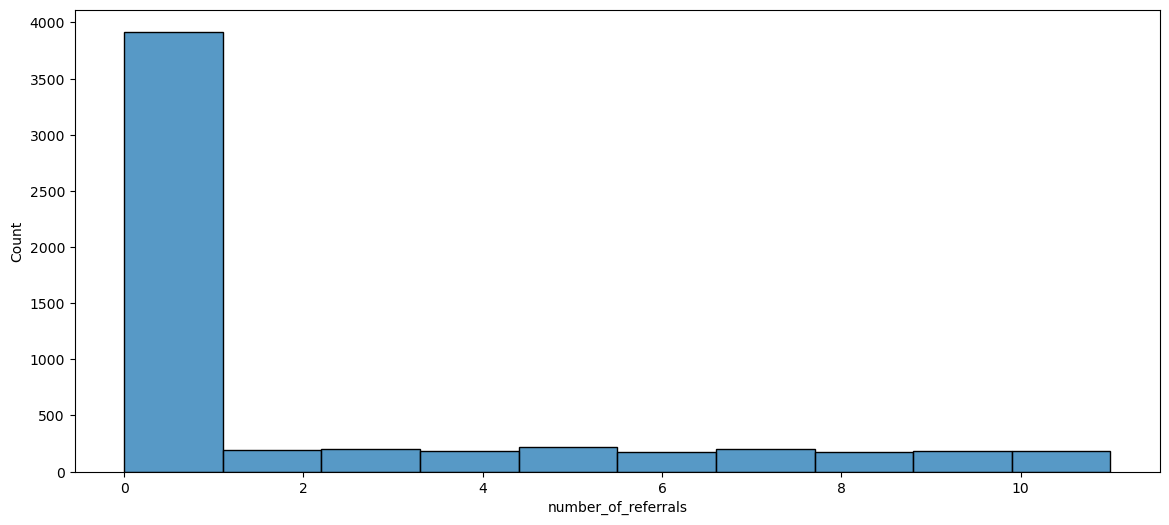

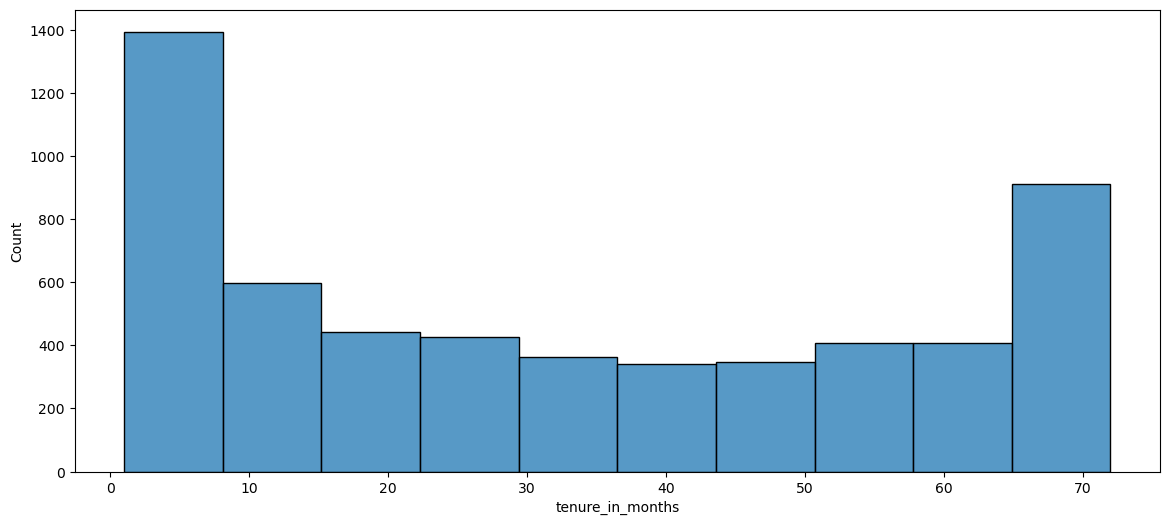

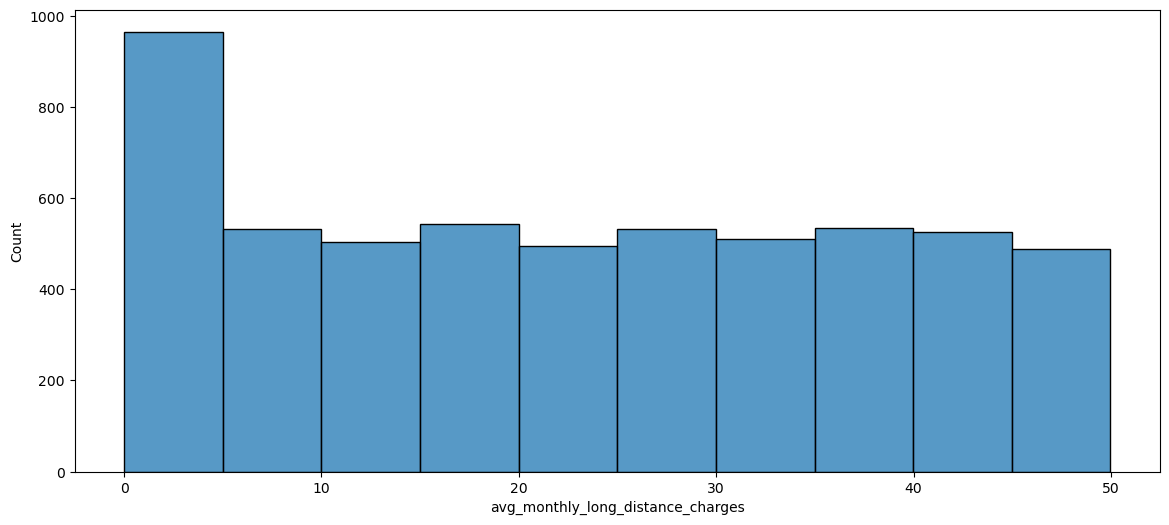

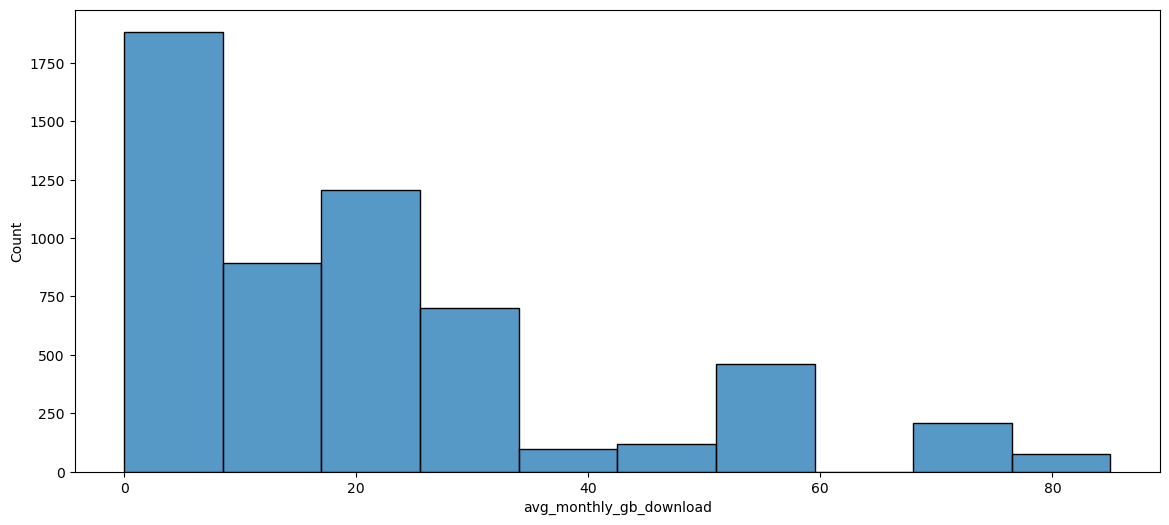

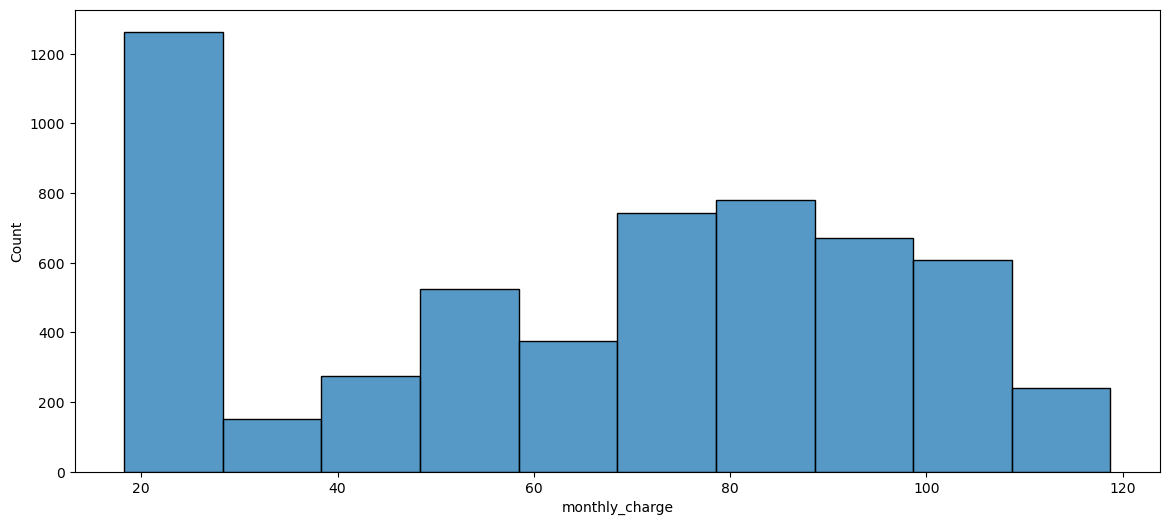

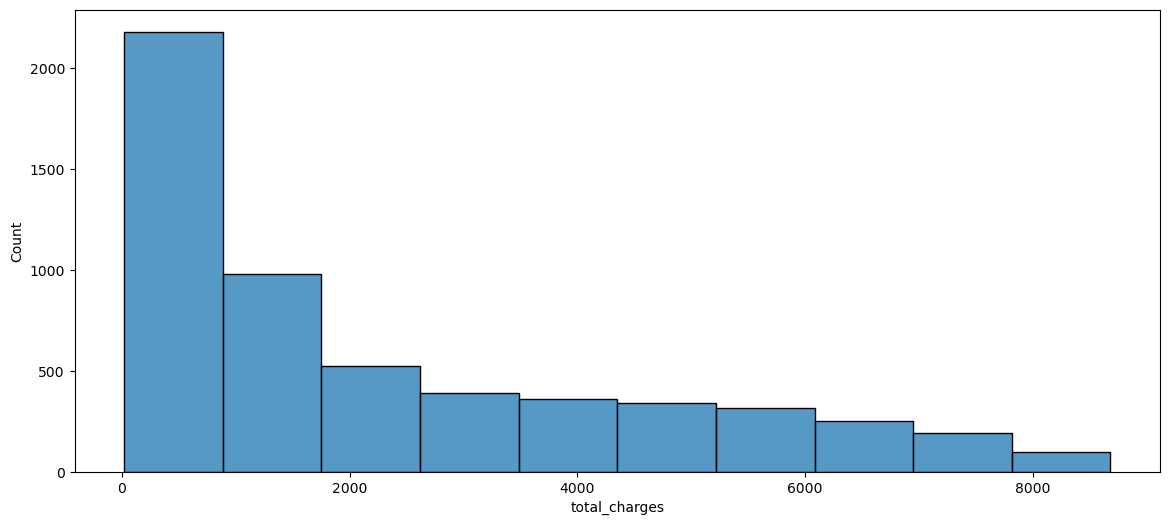

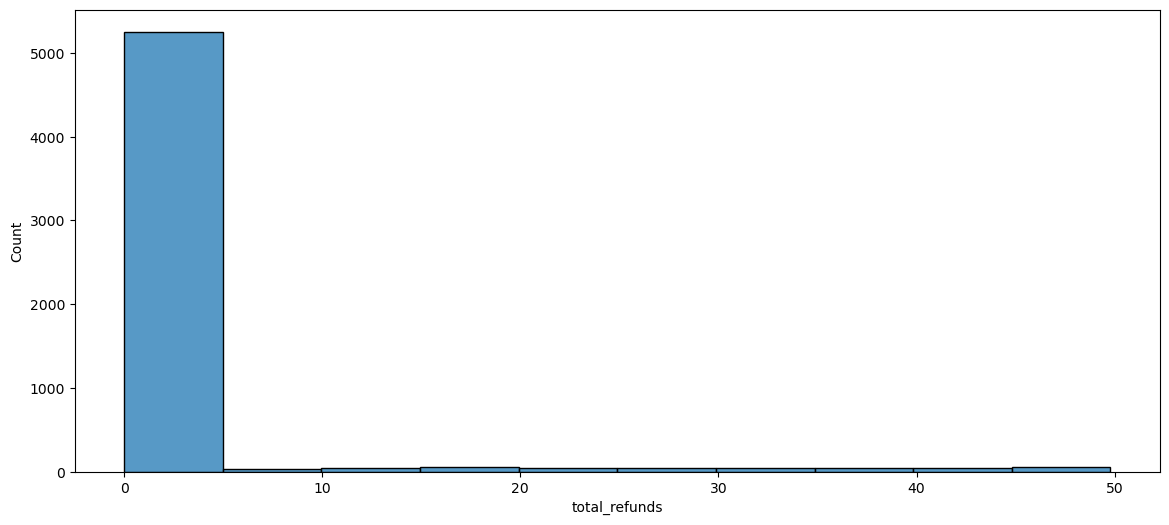

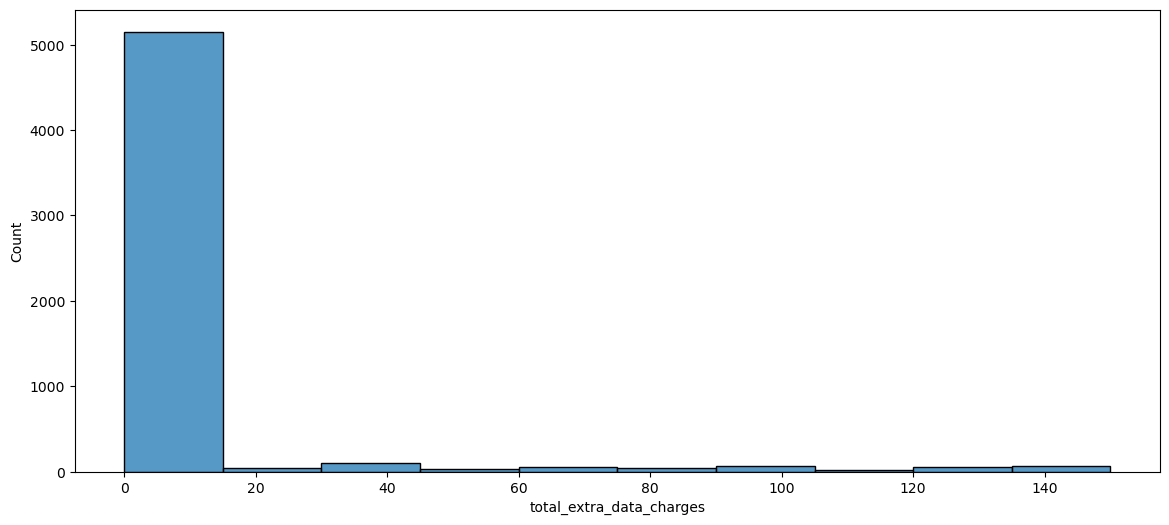

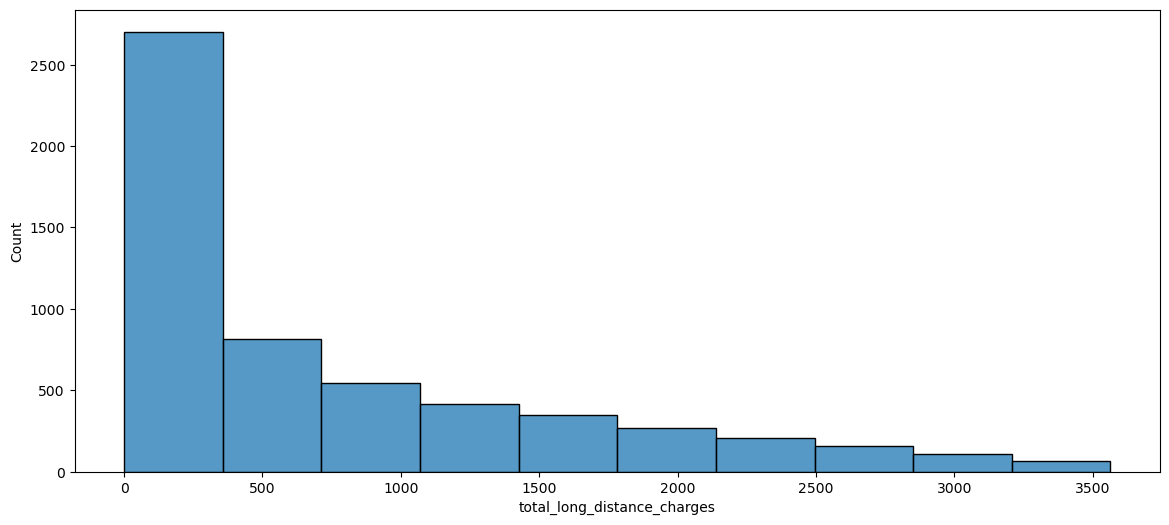

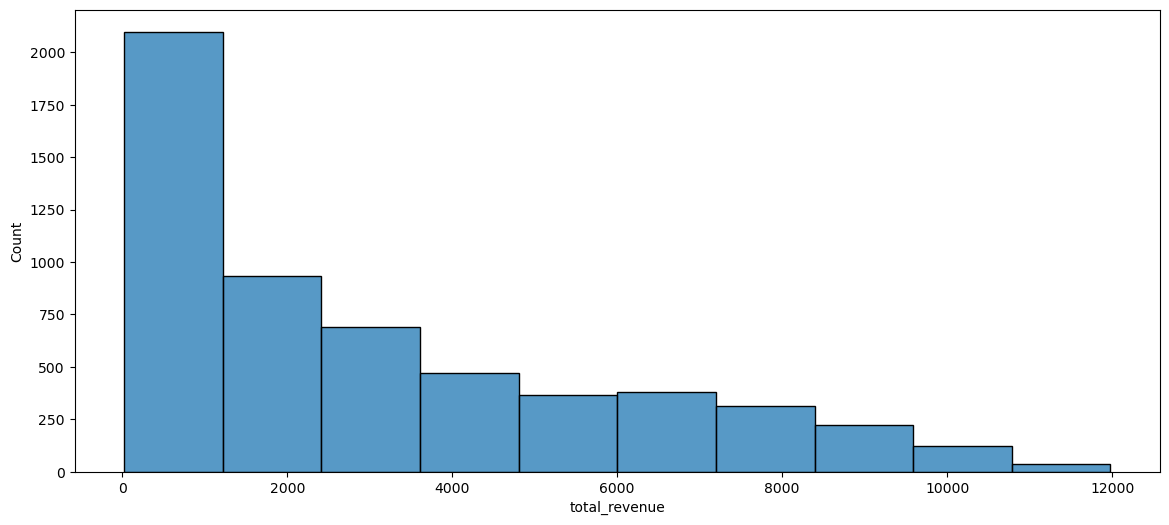

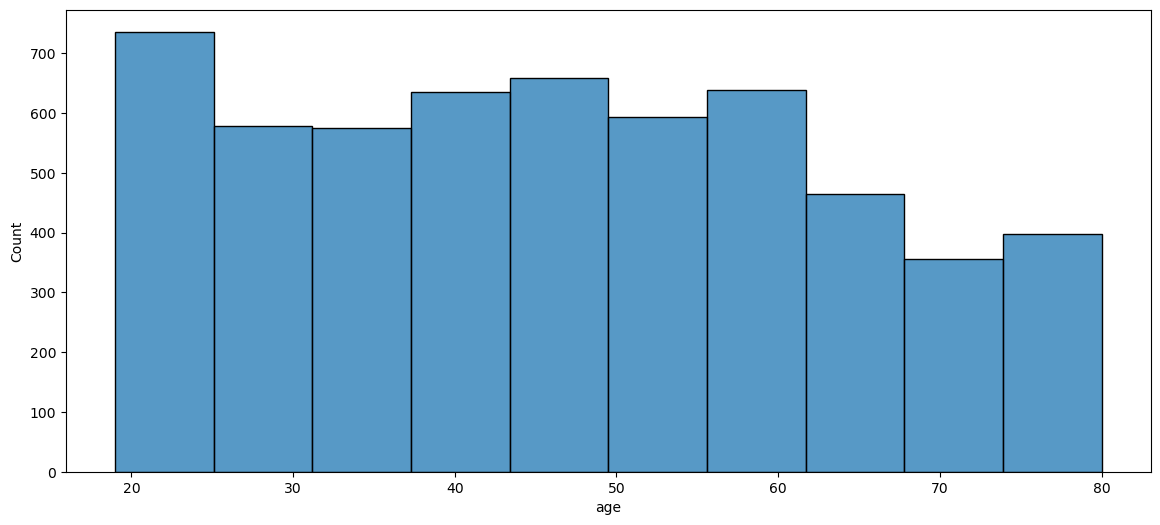

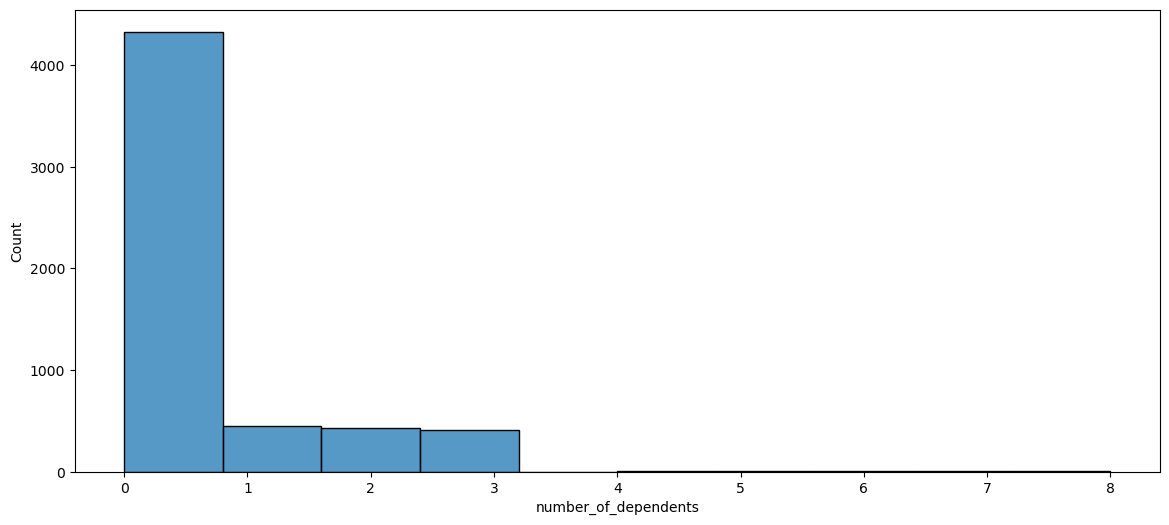

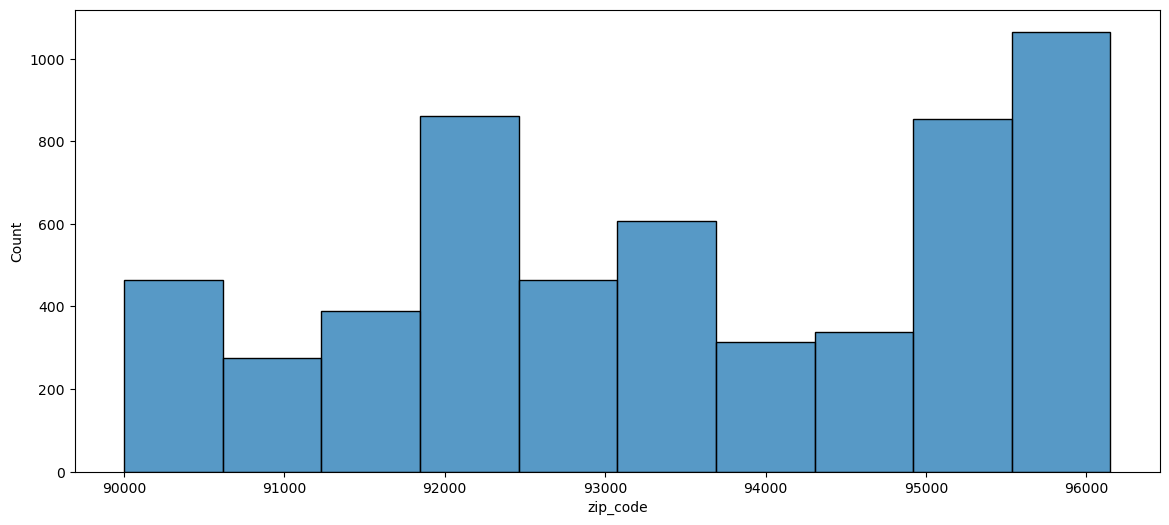

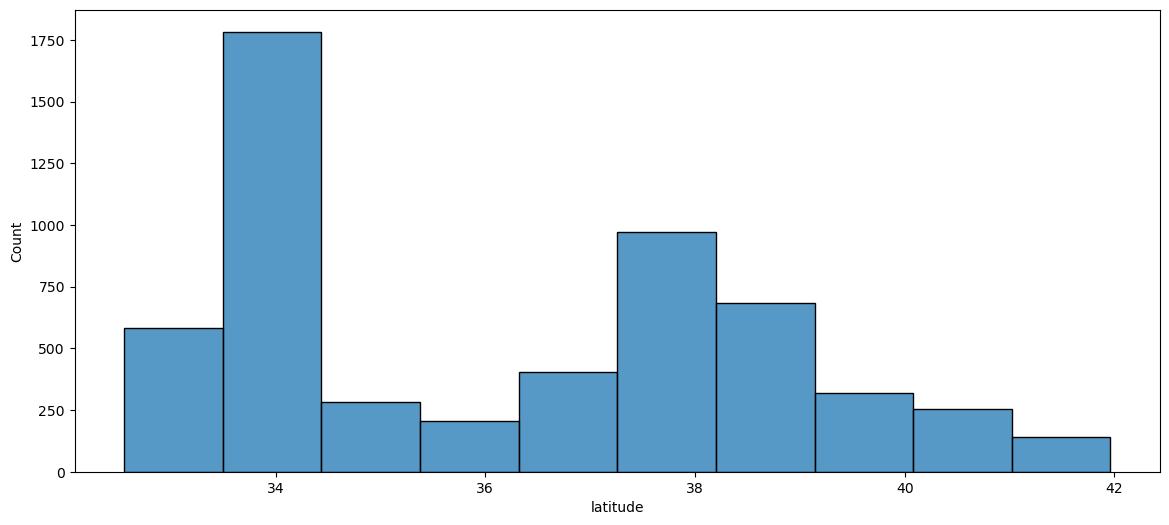

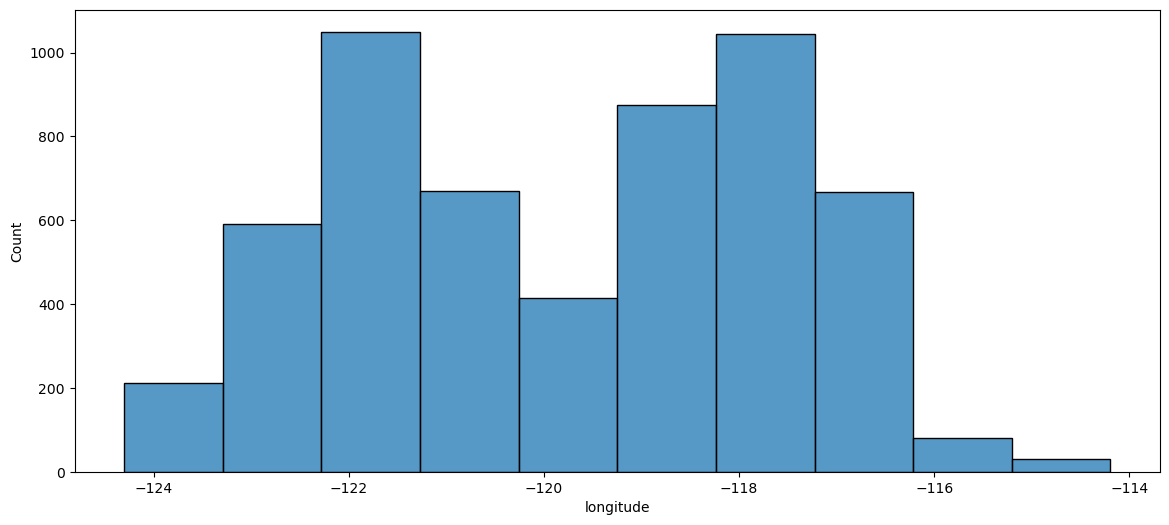

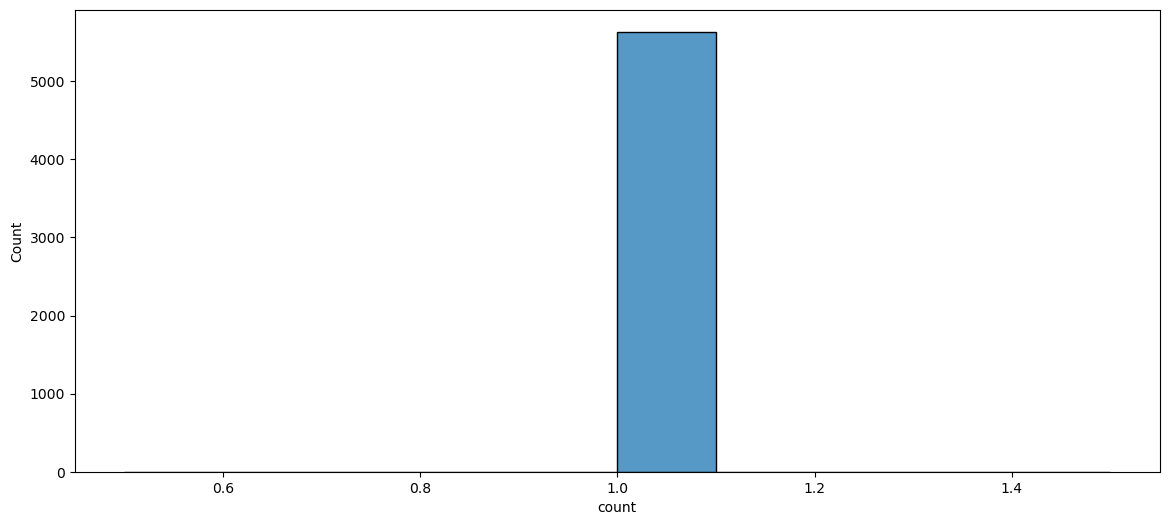

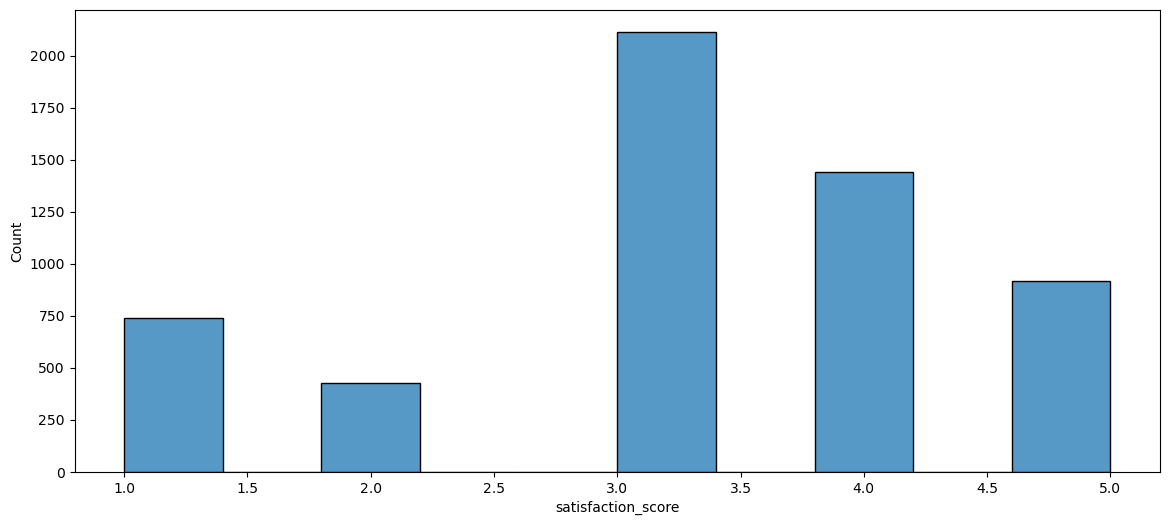

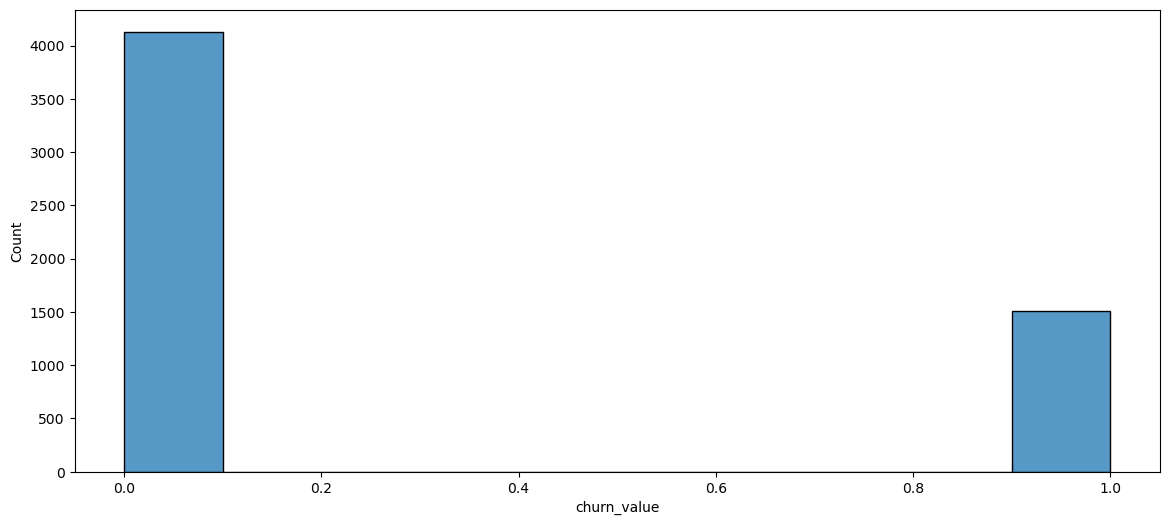

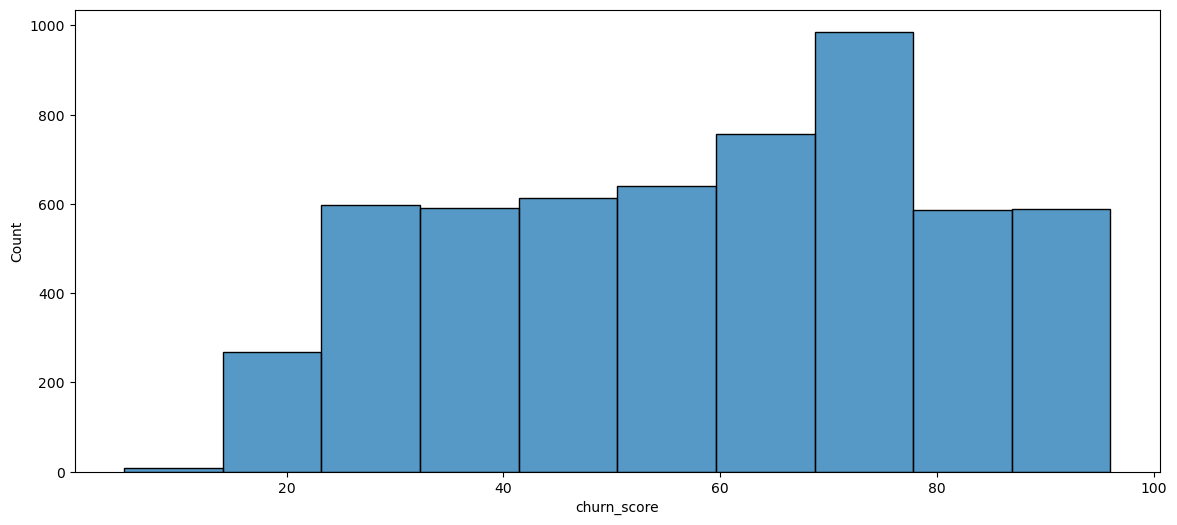

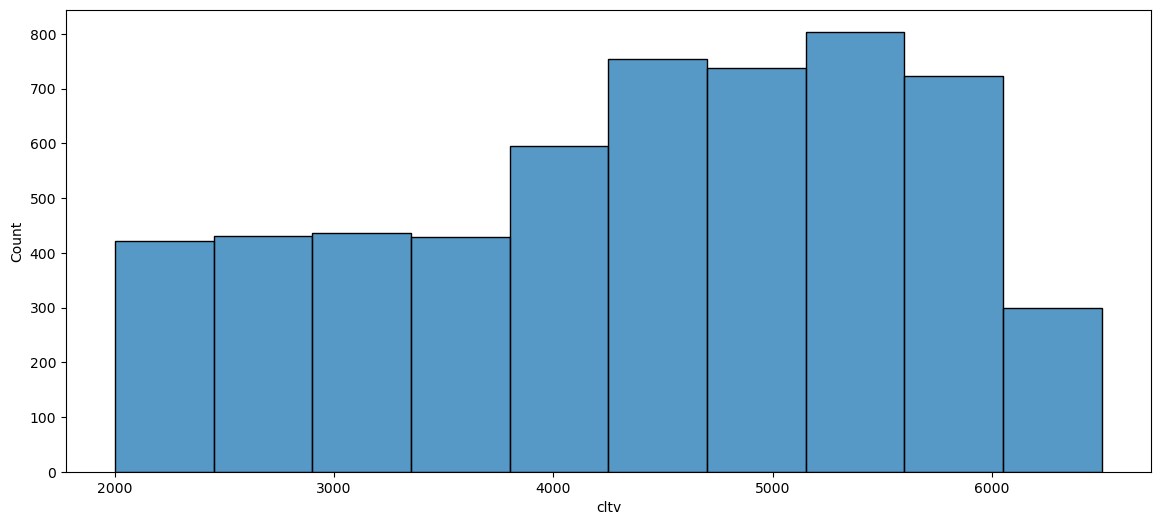

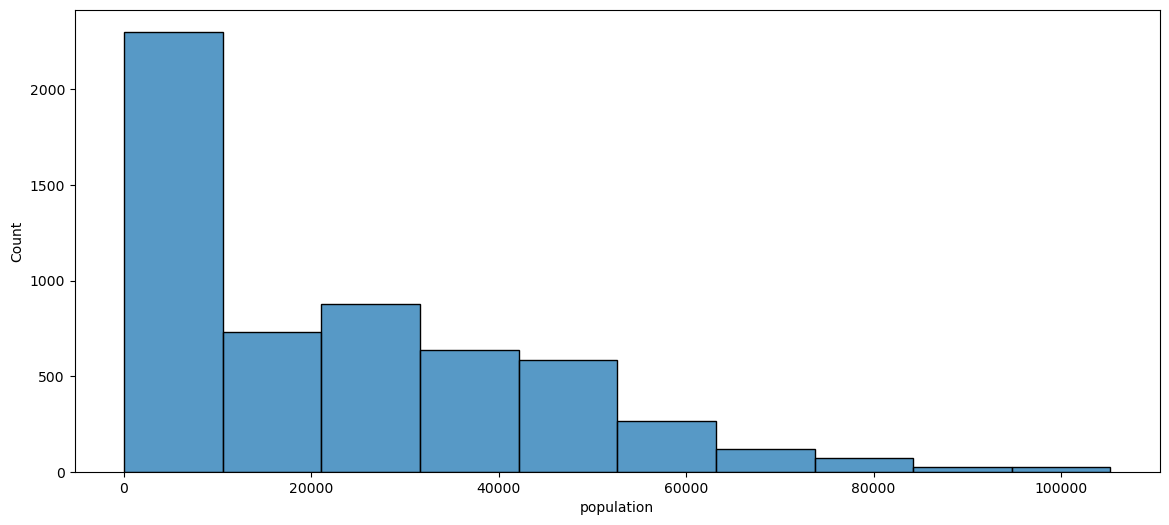

In [19]:
bivalue_columns_x = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    ,'senior_citizen'
    ,'married'
]
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



In [20]:
#"population","citv",
#df['Healthcare_Costs'] = np.log(df['Healthcare Costs'])
#df['Incidence_Rate_per_100K'] = np.log(df['Incidence Rate per 100K'])
#df['Mortality_Rate_per_100K'] = np.log(df['Mortality Rate per 100K'])
#df['Tumor_Size_(mm)'] = np.cbrt(df['Tumor Size (mm)'])

Correlation between Numerical Variables

<Axes: >

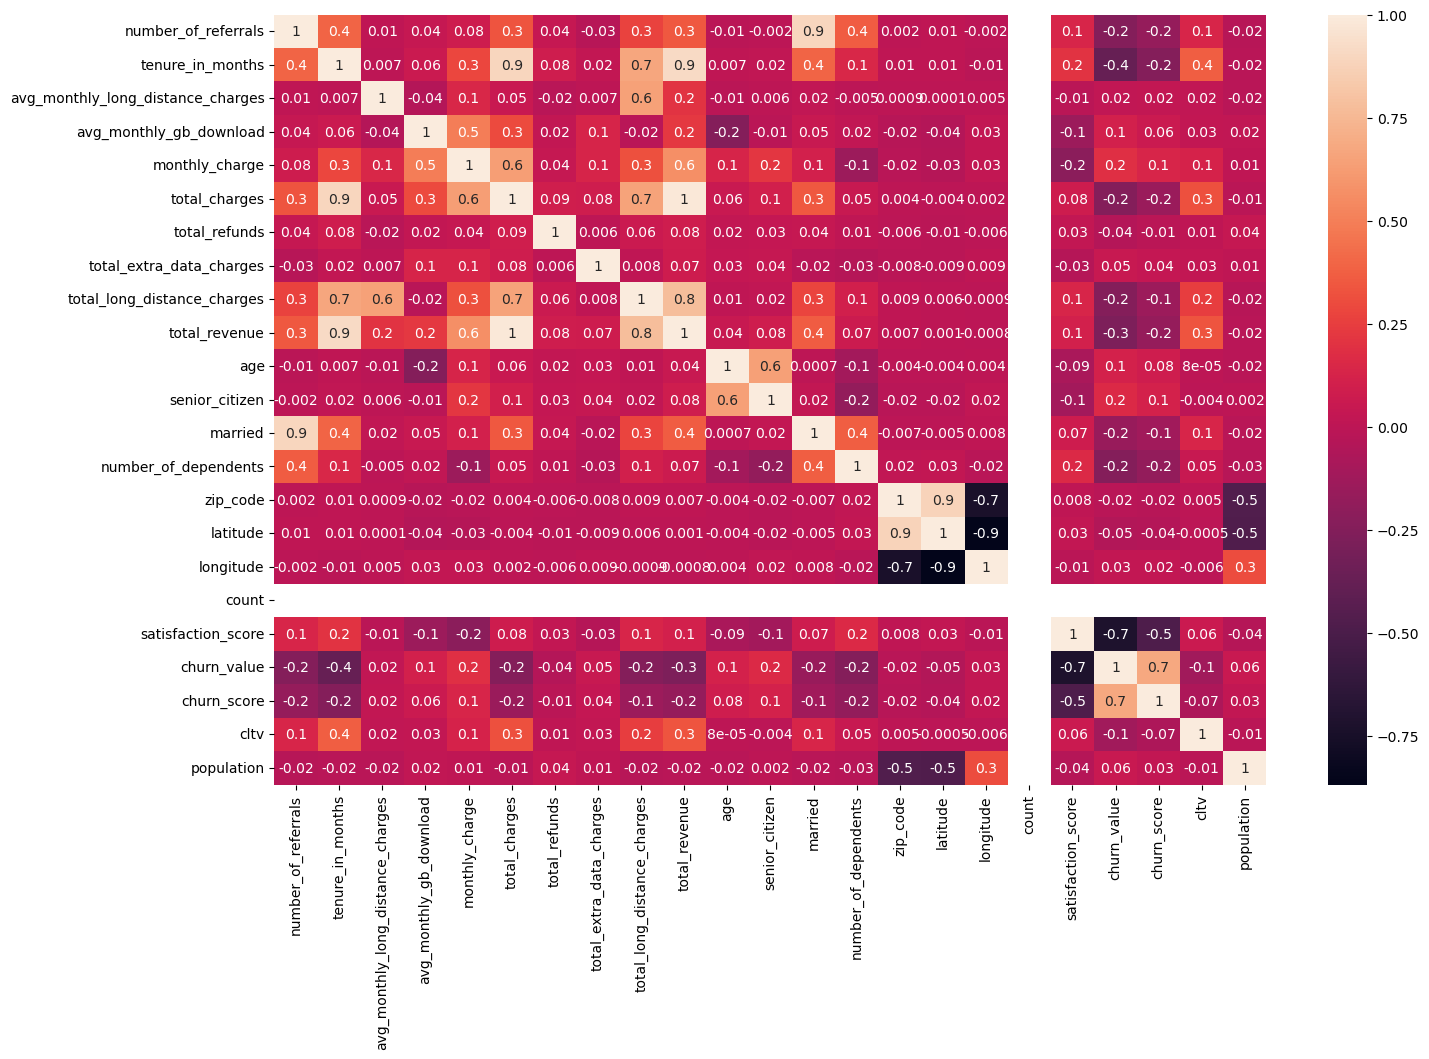

In [21]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [22]:
df_corr

,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
number_of_referrals,1.000000,0.388236,0.013597,0.041928,0.077788,0.332107,0.038247,-0.025594,0.267925,0.345988,...,0.364814,0.002476,0.011374,-0.002144,NaN,0.134555,-0.241612,-0.172301,0.136798,-0.023052
tenure_in_months,0.388236,1.000000,0.007097,0.061696,0.278136,0.892592,0.083734,0.024024,0.664465,0.915065,...,0.140311,0.011987,0.014024,-0.014309,NaN,0.201946,-0.379275,-0.246603,0.371794,-0.018656
avg_monthly_long_distance_charges,0.013597,0.007097,1.000000,-0.037451,0.142993,0.051496,-0.017384,0.006567,0.645036,0.200594,...,-0.004778,0.000917,0.000111,0.005368,NaN,-0.010320,0.018170,0.024237,0.020091,-0.015866
avg_monthly_gb_download,0.041928,0.061696,-0.037451,1.000000,0.495710,0.298768,0.024587,0.129695,-0.015679,0.223337,...,0.020831,-0.022555,-0.038043,0.026865,NaN,-0.145963,0.104077,0.062259,0.027062,0.020134
monthly_charge,0.077788,0.278136,0.142993,0.495710,1.000000,0.634425,0.038450,0.130356,0.319136,0.566960,...,-0.139009,-0.015632,-0.034583,0.026400,NaN,-0.214256,0.182794,0.131877,0.117635,0.010264
total_charges,0.332107,0.892592,0.051496,0.298768,0.634425,1.000000,0.089346,0.083010,0.652192,0.978885,...,0.045140,0.004236,-0.003673,0.001997,NaN,0.076158,-0.243165,-0.151355,0.319128,-0.012220
total_refunds,0.038247,0.083734,-0.017384,0.024587,0.038450,0.089346,1.000000,0.006175,0.058642,0.083290,...,0.013607,-0.006159,-0.010925,-0.006365,NaN,0.028659,-0.038364,-0.010291,0.009899,0.040628
total_extra_data_charges,-0.025594,0.024024,0.006567,0.129695,0.130356,0.083010,0.006175,1.000000,0.008344,0.073641,...,-0.034439,-0.008369,-0.009294,0.009050,NaN,-0.034949,0.046760,0.035646,0.026136,0.010821
total_long_distance_charges,0.267925,0.664465,0.645036,-0.015679,0.319136,0.652192,0.058642,0.008344,1.000000,0.777337,...,0.095835,0.009412,0.006010,-0.000937,NaN,0.138401,-0.245201,-0.143088,0.241350,-0.024251
total_revenue,0.345988,0.915065,0.200594,0.223337,0.566960,0.978885,0.083290,0.073641,0.777337,1.000000,...,0.069555,0.007326,0.001098,-0.000771,NaN,0.108793,-0.274275,-0.170587,0.330918,-0.017624


In [23]:
for col in df_numerical_variables.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 3                   │
│ 9                   │
│ 6                   │
│ 0                   │
│ 4                   │
│ …                   │
│ 10                  │
│ 2                   │
│ 5                   │
│ 8                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_months
shape: (72, 1)
┌──────────────────┐
│ tenure_in_months │
│ ---              │
│ i64              │
╞══════════════════╡
│ 15               │
│ 9                │
│ 12               │
│ 21               │
│ 18               │
│ …                │
│ 65               │
│ 62               │
│ 71               │
│ 59               │
│ 68               │
└──────────────────┘

Coluna: avg_monthly_long_distance_charges
shape: (3_175, 1)
┌─────────────────────────────────┐
│ avg_monthly_long_distance_char… │
│ ---             

In [24]:
bivalue_columns = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    #,'senior_citizen'
    #,'married'
]

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\1510456290.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


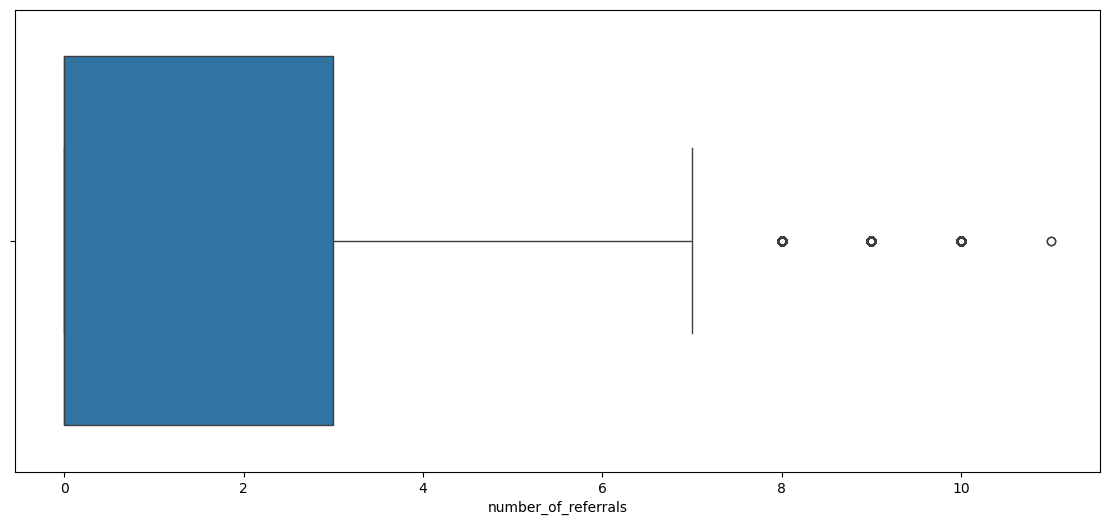

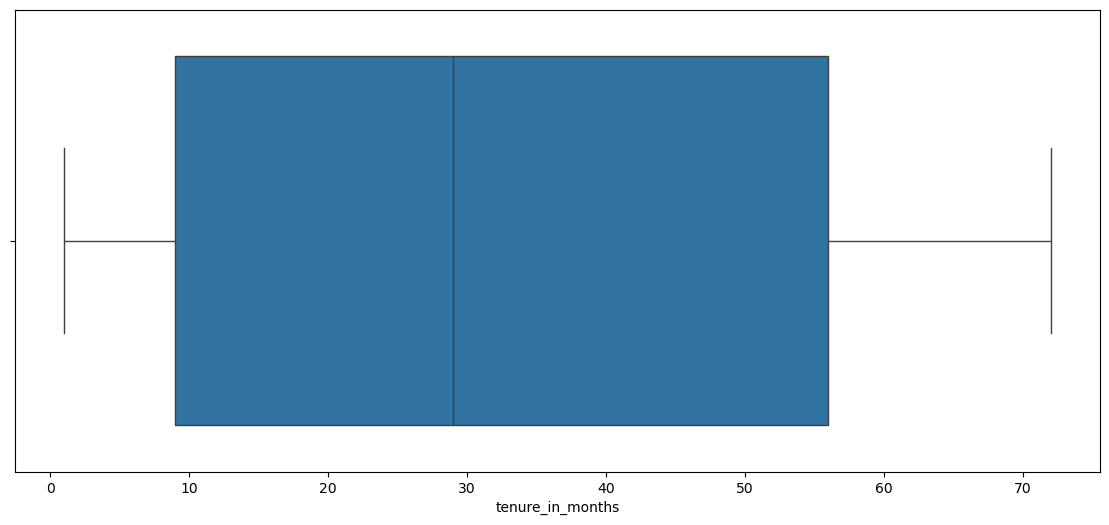

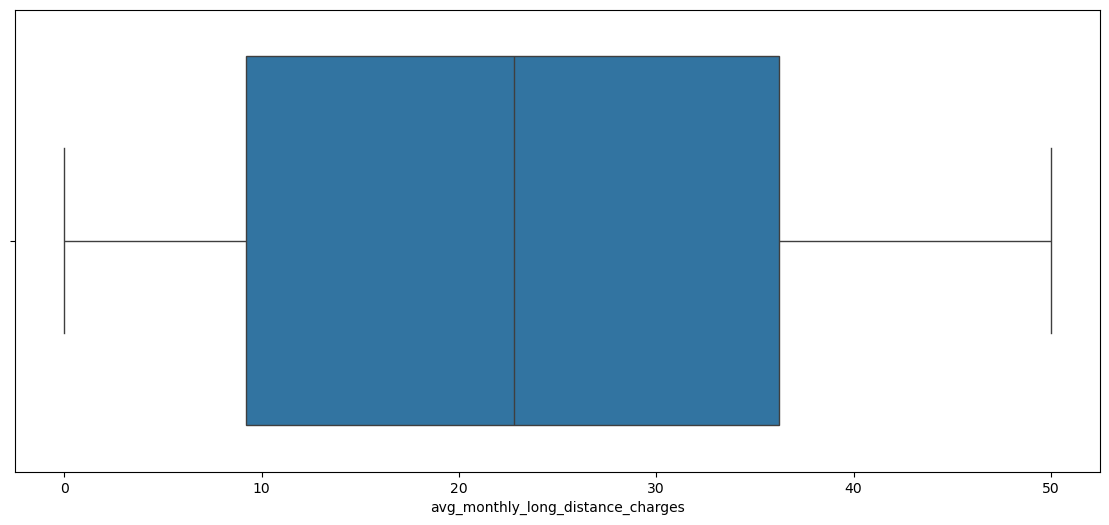

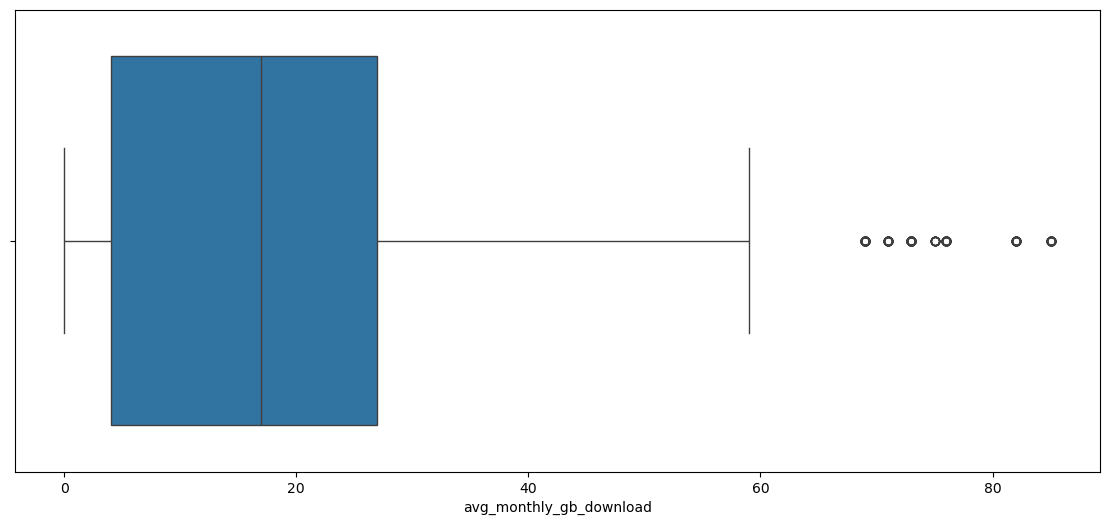

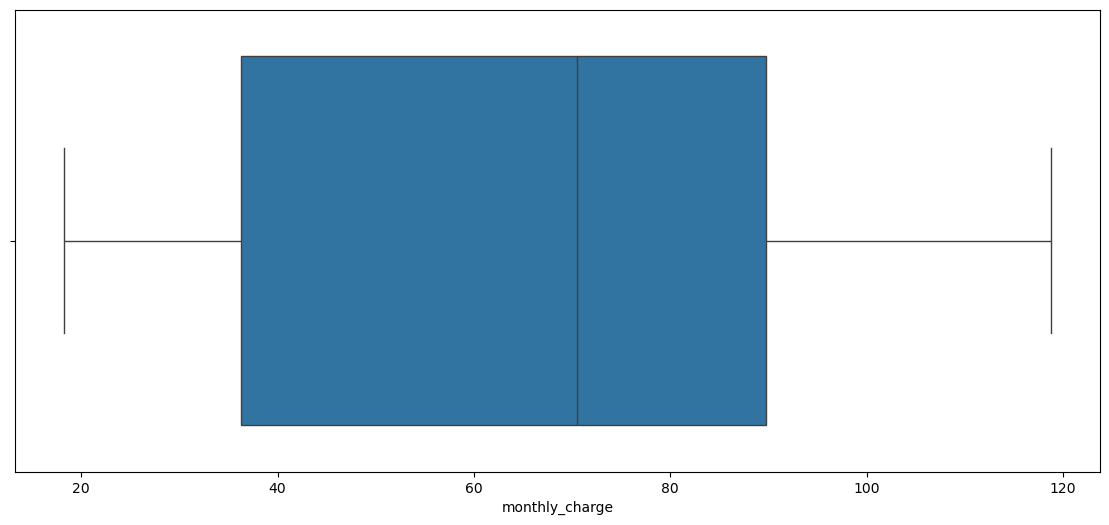

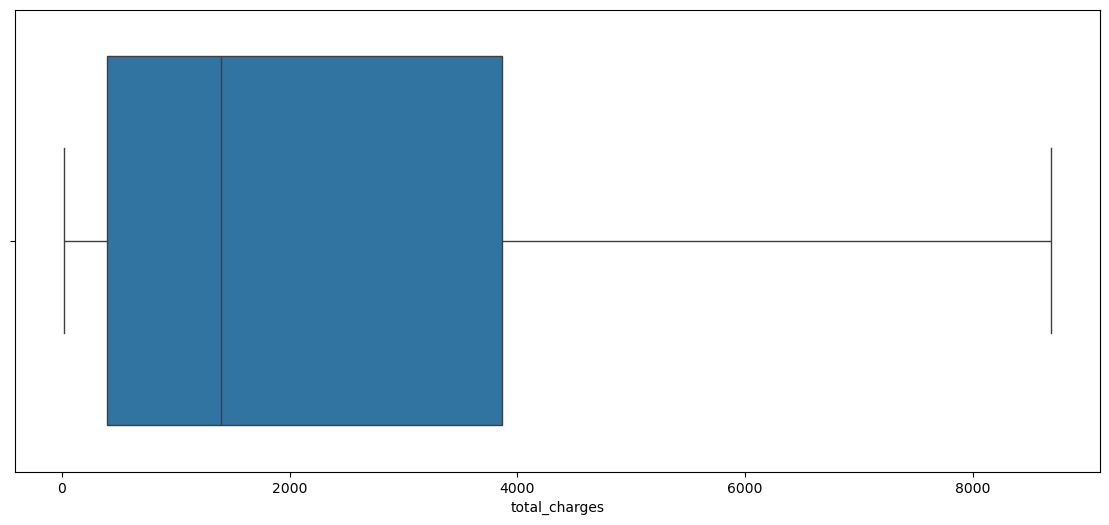

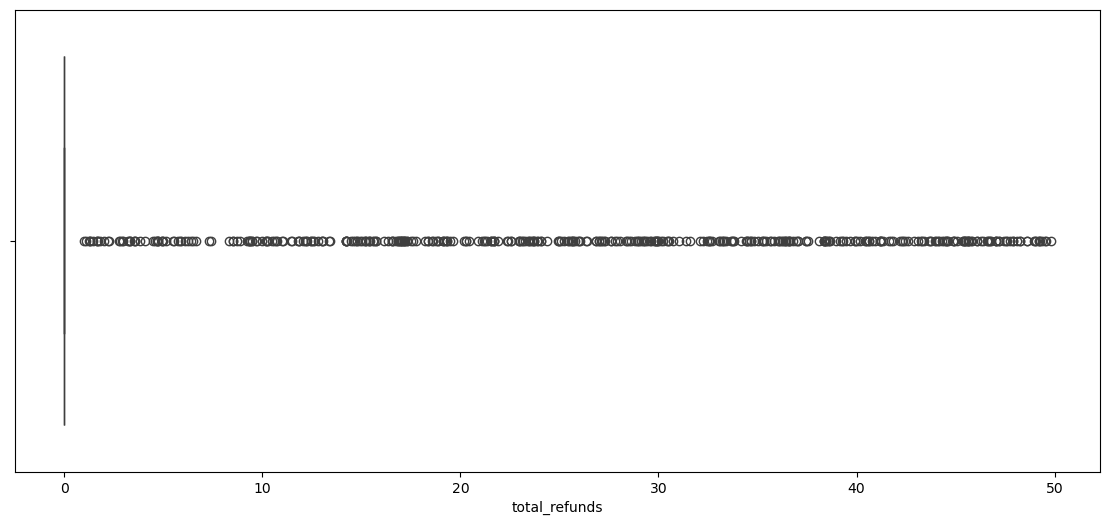

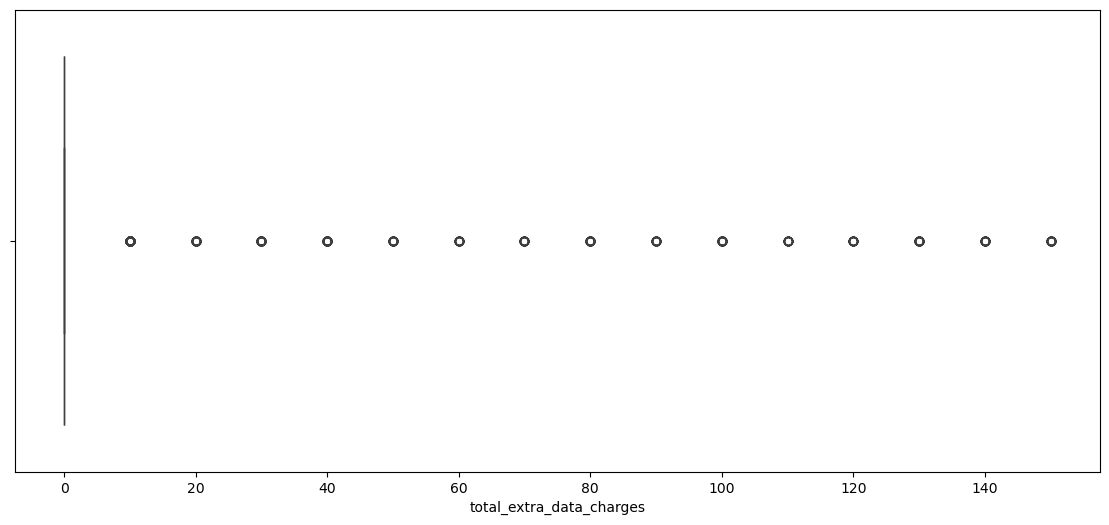

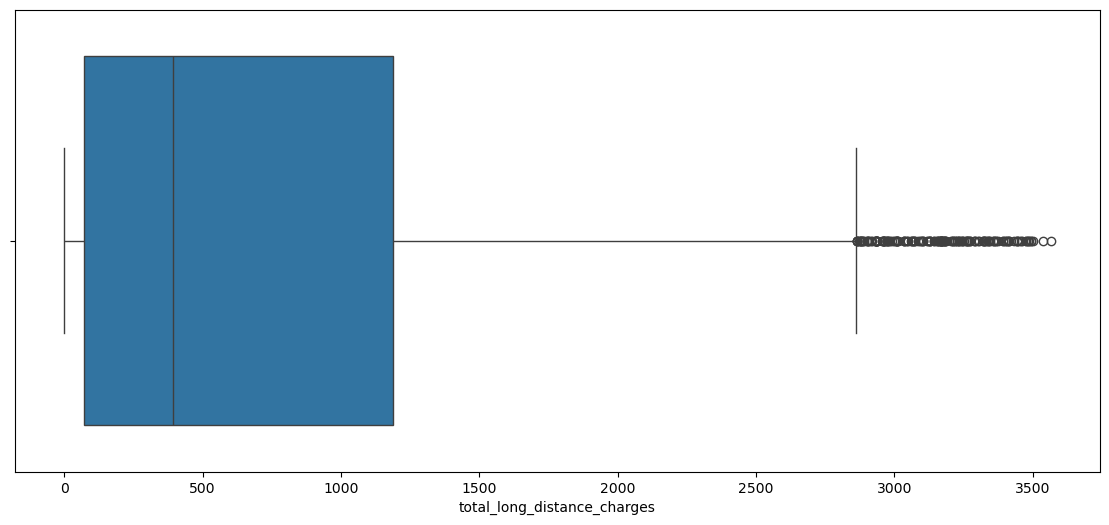

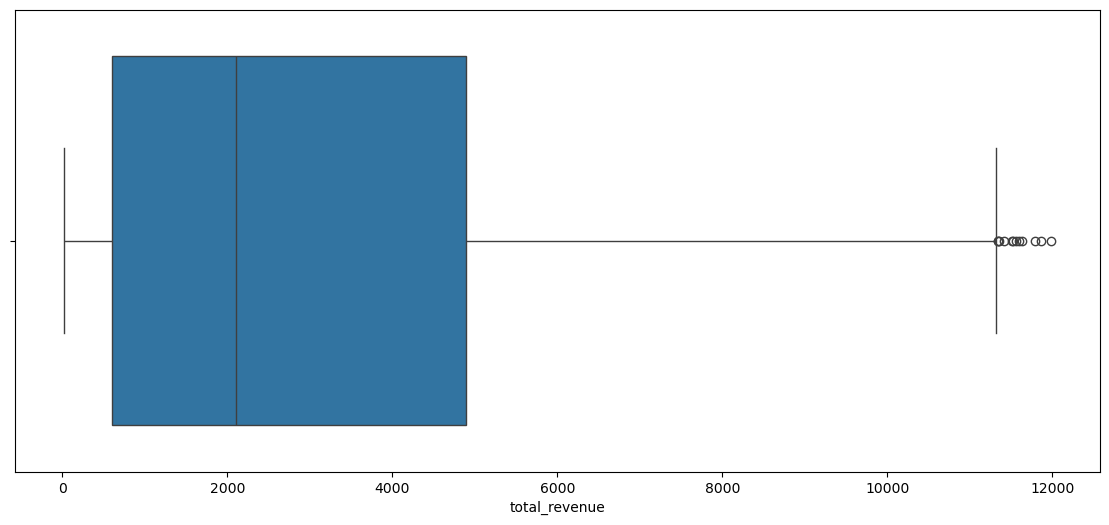

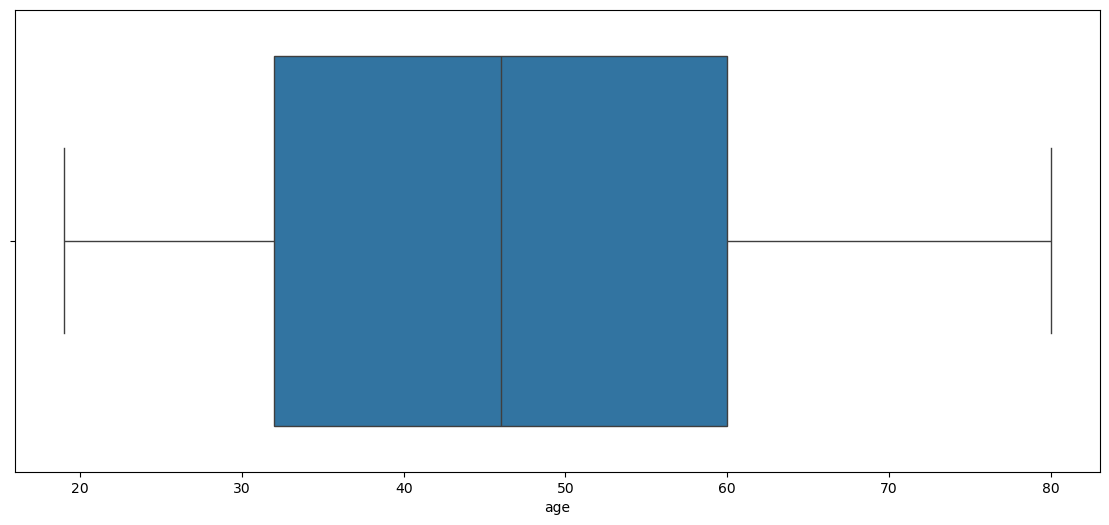

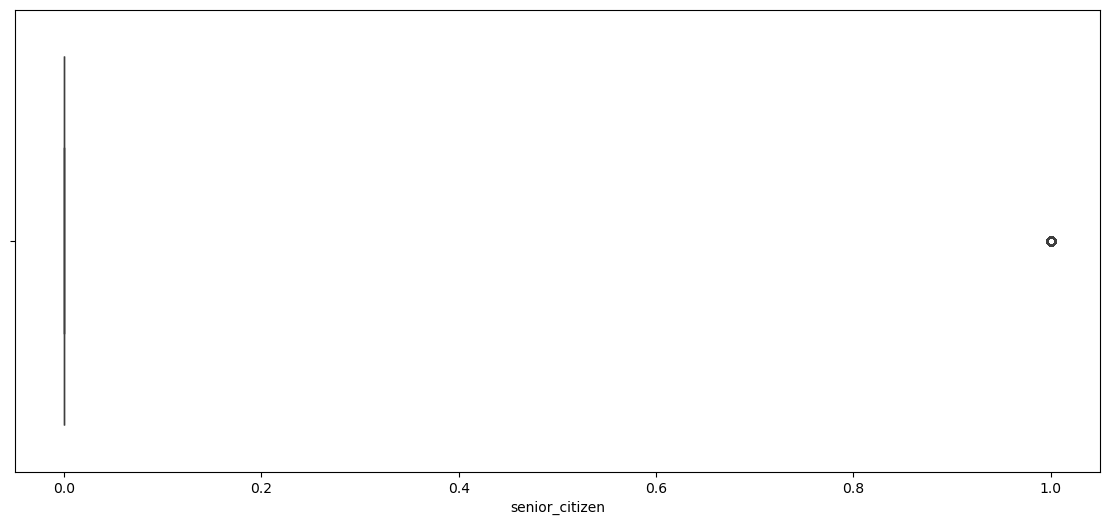

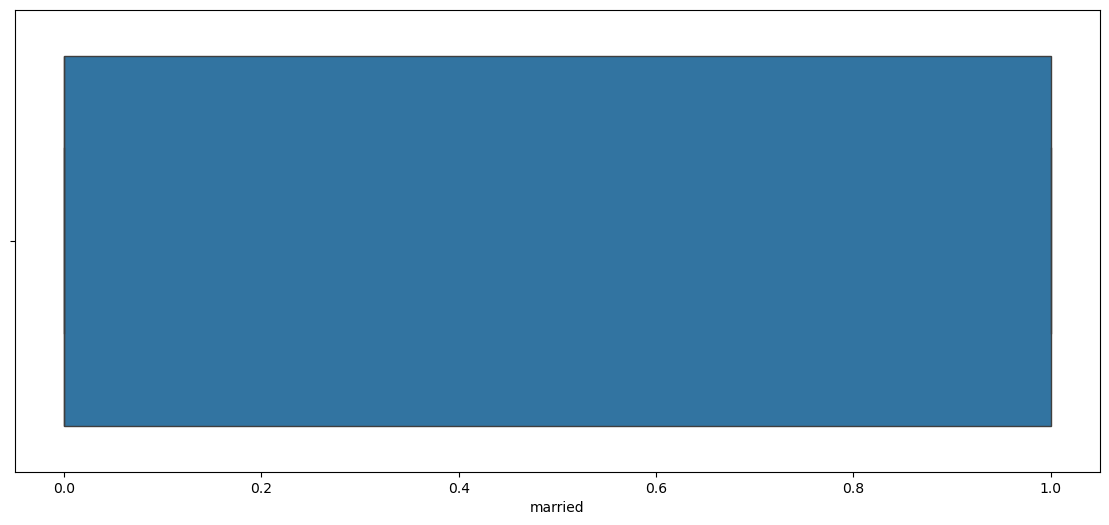

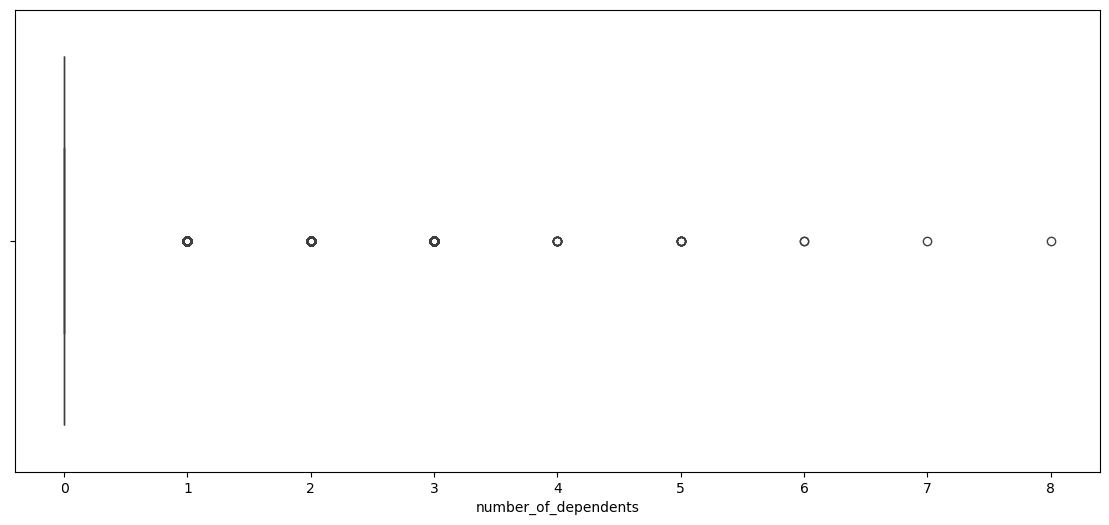

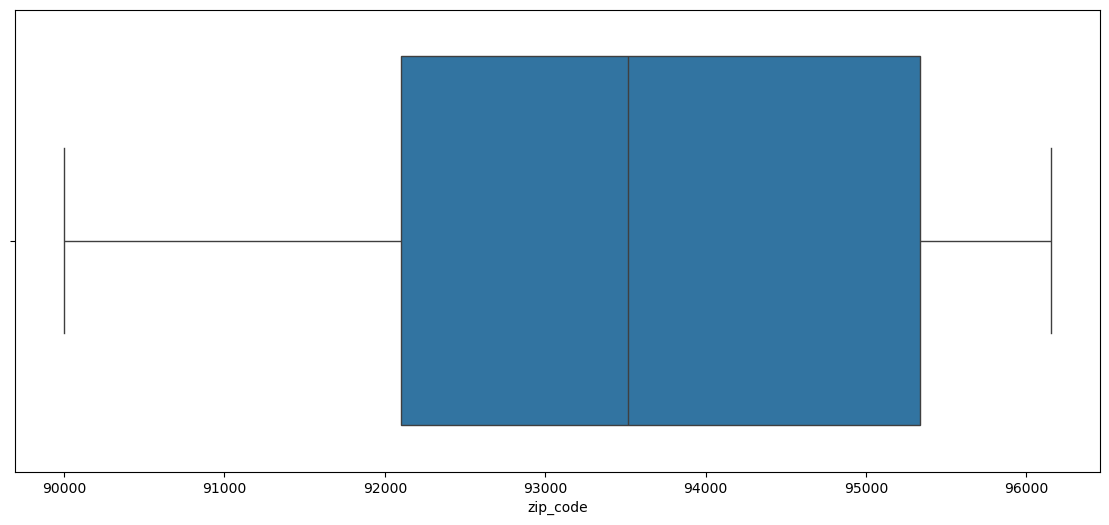

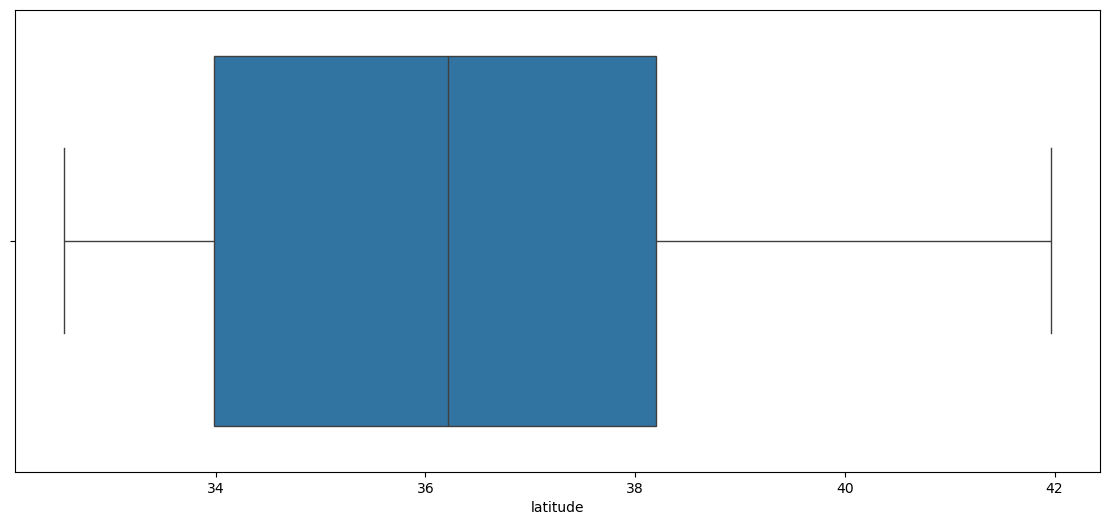

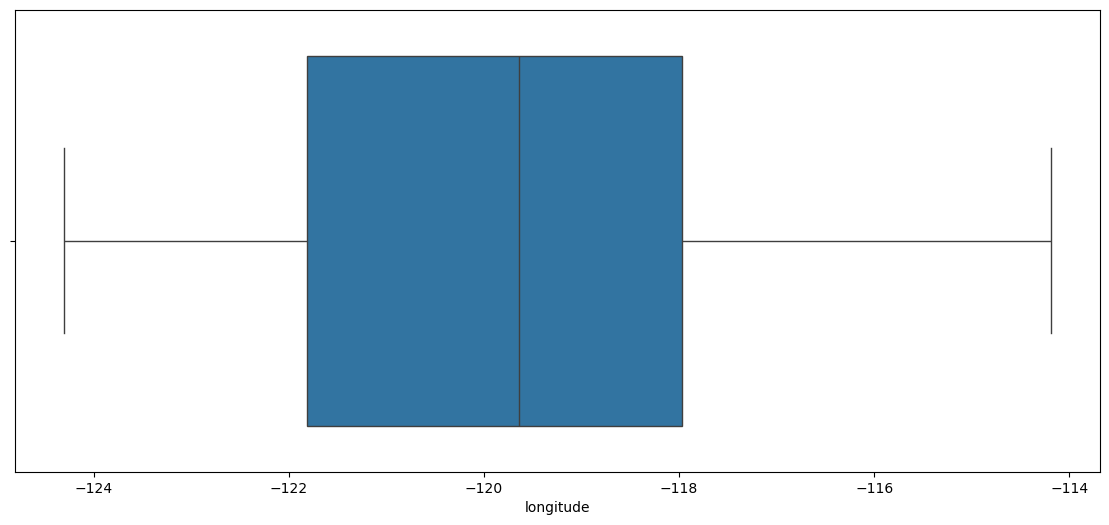

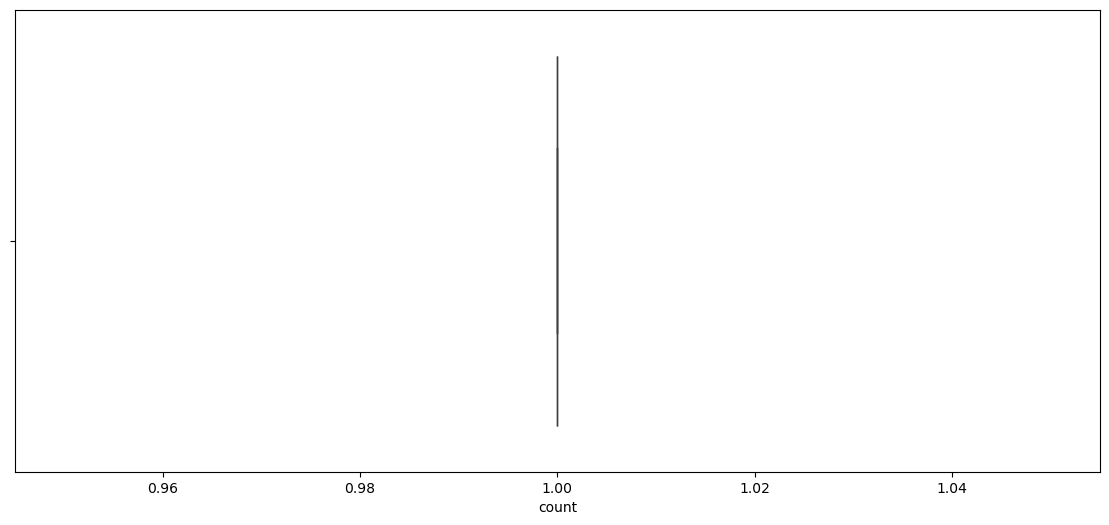

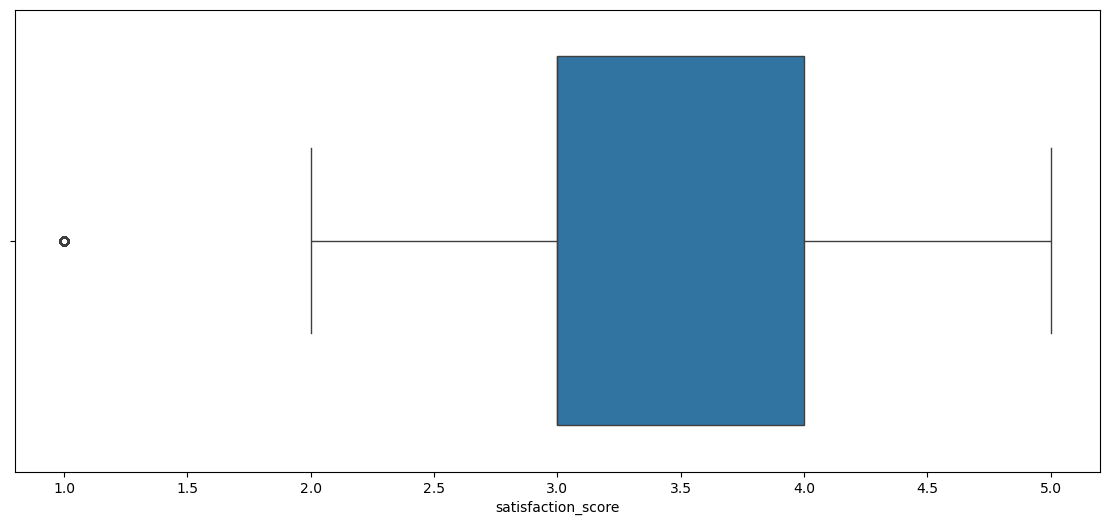

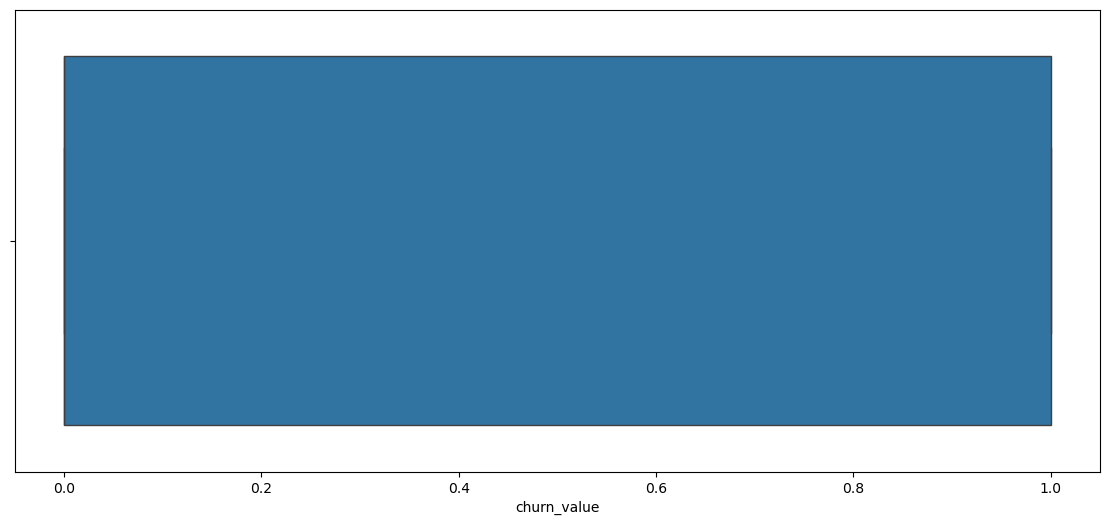

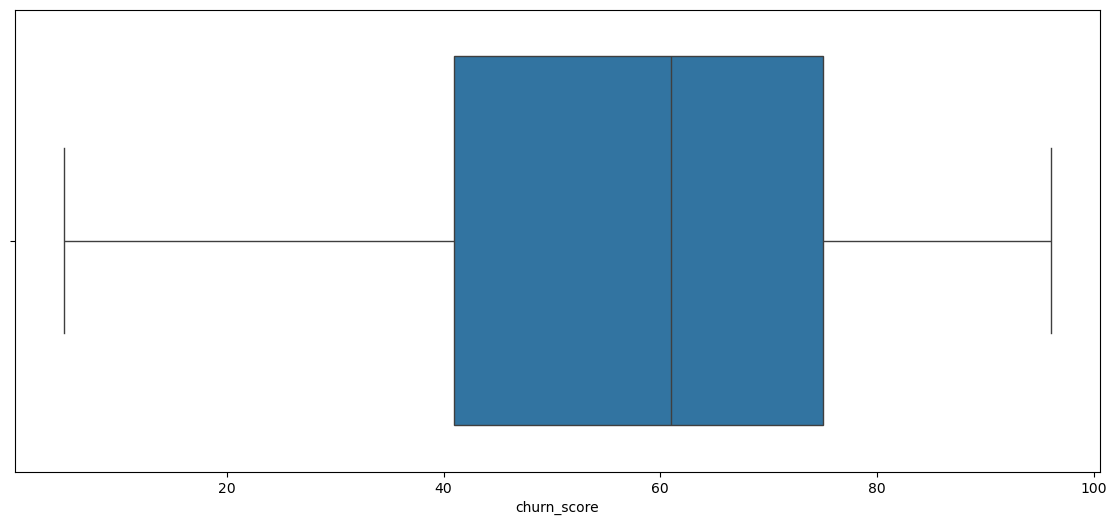

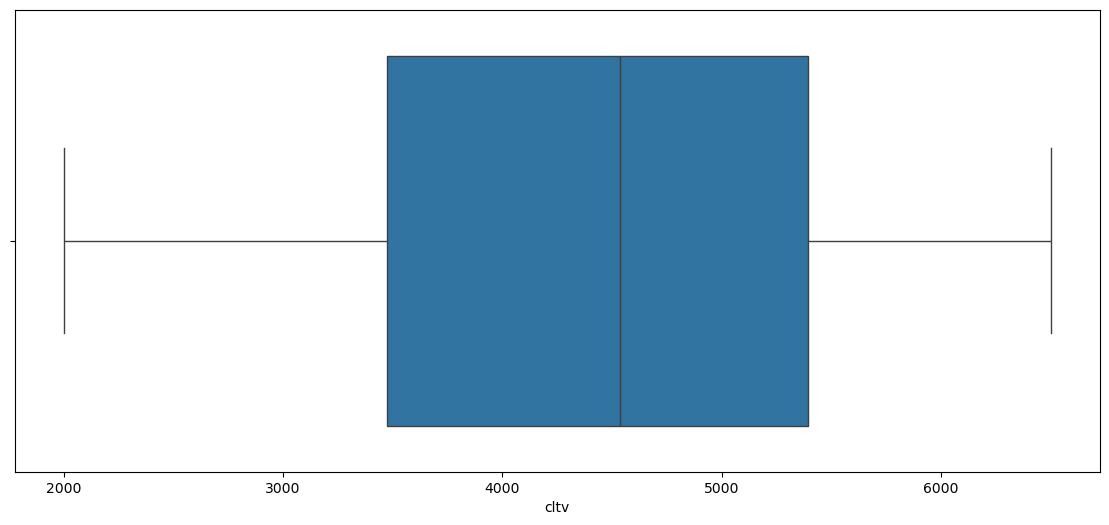

In [25]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6))
    sns.boxplot(ax = ax1, data = df_numerical_variables, x = col)
plt.close()
#Using boxplots to better visualize the outliers

In [26]:
for col in ['number_of_dependents', 'total_extra_data_charges', 'total_refunds']: 
    print(df.select(col).unique())
    print()

shape: (9, 1)
┌──────────────────────┐
│ number_of_dependents │
│ ---                  │
│ i64                  │
╞══════════════════════╡
│ 0                    │
│ 3                    │
│ 6                    │
│ 4                    │
│ 7                    │
│ 1                    │
│ 2                    │
│ 5                    │
│ 8                    │
└──────────────────────┘

shape: (16, 1)
┌──────────────────────────┐
│ total_extra_data_charges │
│ ---                      │
│ i64                      │
╞══════════════════════════╡
│ 140                      │
│ 0                        │
│ 30                       │
│ 60                       │
│ 90                       │
│ …                        │
│ 130                      │
│ 20                       │
│ 50                       │
│ 80                       │
│ 110                      │
└──────────────────────────┘

shape: (400, 1)
┌───────────────┐
│ total_refunds │
│ ---           │
│ f64           │
╞════════════

In [27]:

df.select(
    pl.col('number_of_dependents').value_counts(sort=True)
).unnest('number_of_dependents')


number_of_dependents,count
i64,u32
0,4332
1,445
2,430
3,407
5,8
4,8
6,2
8,1
7,1


In [28]:
df.select(
    pl.col('senior_citizen').value_counts(sort=True)
).unnest('senior_citizen')

senior_citizen,count
i64,u32
0,4720
1,914


<a class="anchor" id="1st-bullet">

## 1.1Pre-Processing

</a>

In [29]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [30]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 2615-YVMYX  │
│ 1480-IVEVR  │
│ 6778-JFCMK  │
│ 4654-DLAMQ  │
│ 8313-NDOIA  │
│ …           │
│ 7129-CAKJW  │
│ 5453-AXEPF  │
│ 7346-MEDWM  │
│ 8439-LTUGF  │
│ 2523-EWWZL  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer A │
│ None    │
│ Offer E │
│ Offer C │
│ Offer D │
│ Offer B │
└─────────┘

Coluna: phone_service
shape: (2, 1)
┌───────────────┐
│ phone_service │
│ ---           │
│ str           │
╞═══════════════╡
│ Yes           │
│ No            │
└───────────────┘

Coluna: multiple_lines
shape: (2, 1)
┌────────────────┐
│ multiple_lines │
│ ---            │
│ str            │
╞════

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\2074748385.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


<a class="anchor" id="1st-bullet">

### 1.1.2 Solve Outliers

</a>

In [31]:
q1, q3 = df.select([
    pl.col("number_of_referrals").quantile(0.25).alias("q1"),
    pl.col("number_of_referrals").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("number_of_referrals")
      .clip(upper_bound=upper_bound)
)

In [32]:
q1, q3 = df.select([
    pl.col("avg_monthly_gb_download").quantile(0.25).alias("q1"),
    pl.col("avg_monthly_gb_download").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("avg_monthly_gb_download")
      .clip(upper_bound=upper_bound)
)

In [33]:
q1, q3 = df.select([
    pl.col("total_long_distance_charges").quantile(0.25).alias("q1"),
    pl.col("total_long_distance_charges").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_long_distance_charges")
      .clip(upper_bound=upper_bound)
)

In [34]:
q1, q3 = df.select([
    pl.col("total_revenue").quantile(0.25).alias("q1"),
    pl.col("total_revenue").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_revenue")
      .clip(upper_bound=upper_bound)
)

In [35]:
q1, q3 = df.select([
    pl.col("satisfaction_score").quantile(0.25).alias("q1"),
    pl.col("satisfaction_score").quantile(0.75).alias("q3")
]).row(0)

lower_bound = q1 - (q3 - q1) * 1.5

df = df.with_columns(
    pl.when(pl.col("satisfaction_score") < lower_bound)
      .then(pl.lit(lower_bound))
      .otherwise(pl.col("satisfaction_score"))
      .alias("satisfaction_score")
)

<a class="anchor" id="1st-bullet">

### 1.1.3 Encoding variables

</a>

In [36]:
valid_vals = ["yes", "no", "male", "female"]

for col in bivalue_columns:
    df = df.with_columns(
        pl.col(col).str.to_lowercase().str.strip_chars()
    )

    mode_val = (
        df
        .filter(pl.col(col).is_in(valid_vals))
        .select(pl.col(col).mode())
        .item()
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(valid_vals))
            .then(pl.col(col))
            .otherwise(pl.lit(mode_val))
            .alias(col)
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(["yes", "male"]))
            .then(1)
          .when(pl.col(col).is_in(["no", "female"]))
            .then(0)
          .otherwise(None)
          .cast(pl.Int32)
          .alias(col)
    )

In [37]:
df

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64
"""0378-XSZPU""",1,1,58,"""Offer B""",1,17.22,0,1,"""Cable""",21,1,1,1,0,0,0,0,1,"""One Year""",0,"""Credit Card""",60.3,3563.8,0.0,0,998.76,4562.56,1,31,null,0,1,0,"""San Jose""",95117,"""37.311088, -121.961786""",37.311088,-121.961786,1,"""Q3""",2.0,"""Churned""",1,1,88,4026,"""Dissatisfaction""","""Network reliability""",29914
"""4514-GFCFI""",0,0,16,"""None""",1,17.51,1,1,"""Fiber Optic""",7,0,0,0,0,1,0,0,1,"""Month-to-Month""",1,"""Bank Withdrawal""",84.75,1350.15,0.0,0,280.16,1630.31,0,76,null,1,0,0,"""San Diego""",92117,"""32.825086, -117.199424""",32.825086,-117.199424,1,"""Q3""",2.0,"""Churned""",1,1,91,5136,"""Attitude""","""Attitude of support person""",51213
"""7690-KPNCU""",1,5,64,"""Offer B""",1,26.64,0,1,"""DSL""",61,1,0,1,0,1,1,1,1,"""One Year""",1,"""Credit Card""",73.05,4688.65,0.0,0,1704.96,6393.61,1,20,null,0,1,0,"""Willow Creek""",95573,"""40.949012, -123.655847""",40.949012,-123.655847,1,"""Q3""",3.0,"""Stayed""",0,0,28,4515,"""NO_LABEL""","""NO_LABEL""",1666
"""1621-YNCJH""",1,4,36,"""None""",1,19.24,1,1,"""Fiber Optic""",18,1,1,1,1,0,1,1,0,"""Two Year""",1,"""Credit Card""",106.05,3834.4,0.0,50,692.64,4577.04,0,54,null,0,1,0,"""Sacramento""",95823,"""38.475465, -121.443625""",38.475465,-121.443625,1,"""Q3""",3.0,"""Stayed""",0,0,25,4505,"""NO_LABEL""","""NO_LABEL""",72199
"""8111-SLLHI""",1,1,39,"""None""",1,33.25,1,1,"""Fiber Optic""",26,0,1,1,0,1,1,1,1,"""Month-to-Month""",1,"""Bank Withdrawal""",105.65,4284.8,0.0,0,1296.75,5581.55,1,65,null,1,1,0,"""San Jose""",95128,"""37.316146, -121.936285""",37.316146,-121.936285,1,"""Q3""",3.0,"""Churned""",1,1,96,4687,"""Attitude""","""Attitude of support person""",32804
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3146-MSEGF""",1,1,72,"""Offer A""",1,20.48,1,1,"""DSL""",6,1,1,1,1,1,1,1,1,"""Two Year""",1,"""Credit Card""",88.05,6425.65,0.0,0,1474.56,7900.21,0,71,null,1,1,0,"""Paramount""",90723,"""33.897122, -118.164432""",33.897122,-118.164432,1,"""Q3""",3.0,"""Stayed""",0,0,8,6102,"""NO_LABEL""","""NO_LABEL""",55306
"""3707-LRWZD""",0,0,32,"""None""",1,40.26,1,1,"""Fiber Optic""",14,0,0,0,0,1,0,0,1,"""One Year""",0,"""Bank Withdrawal""",84.05,2781.85,0.0,0,1288.32,4070.17,0,44,null,0,0,0,"""Oakland""",94611,"""37.828416, -122.216005""",37.828416,-122.216005,1,"""Q3""",2.0,"""Churned""",1,1,68,3553,"""Other""","""Moved""",36517
"""8165-CBKXO""",1,4,66,"""None""",0,0.0,0,1,"""Cable""",25,0,1,1,0,1,1,1,1,"""Two Year""",1,"""Credit Card""",56.75,3708.4,0.0,0,0.0,3708.4,1,35,null,0,1,3,"""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""",3.0,"""Stayed""",0,0,46,5748,"""NO_LABEL""","""NO_LABEL""",68701


<a class="anchor" id="1st-bullet">

### 1.1.4 Double check for null values and duplicates after these all transformations

</a>

In [38]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64


In [40]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    if col not in bivalue_columns:
        print(f"Coluna: {col}")
        print(df.select(col).unique())
        print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 9845-QOMAD  │
│ 9402-ROUMJ  │
│ 2320-YKQBO  │
│ 0142-GVYSN  │
│ 4986-MXSFP  │
│ …           │
│ 7515-LODFU  │
│ 2843-CQMEG  │
│ 5669-SRAIP  │
│ 8069-YQQAJ  │
│ 4123-FCVCB  │
└─────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ None    │
│ Offer D │
│ Offer B │
│ Offer E │
│ Offer C │
│ Offer A │
└─────────┘

Coluna: internet_type
shape: (4, 1)
┌───────────────┐
│ internet_type │
│ ---           │
│ str           │
╞═══════════════╡
│ DSL           │
│ None          │
│ Fiber Optic   │
│ Cable         │
└───────────────┘

Coluna: contract
shape: (3, 1)
┌────────────────┐
│ contract       │
│ ---            │
│ str            │
╞════════════════╡
│ One Year       │
│ Month-to-Month │
│ Two Year       │
└────────────────┘

Coluna: payment_method
shape: (3, 1)
┌─────────────────┐
│ payment_method  │
│ ---             │

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\182089192.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


In [41]:
valid_vals = ["Offer A", "Offer B", "Offer C","Offer D", "Offer E"]
col = "offer"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Offer A")
        .then(1)
        .when(pl.col(col) == "Offer B")
        .then(2)
        .when(pl.col(col) == "Offer C")
        .then(3)
        .when(pl.col(col) == "Offer D")
        .then(4)
        .when(pl.col(col) == "Offer E")
        .then(5)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [42]:
valid_vals = ["DSL", "Cable", "Fiber Optic"]
col = "internet_type"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "DSL")
        .then(1)
        .when(pl.col(col) == "Cable")
        .then(2)
        .when(pl.col(col) == "Fiber Optic")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [43]:
valid_vals = ["Month-to-Month", "One Year", "Two Year"]
col = "contract"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Month-to-Month")
        .then(1)
        .when(pl.col(col) == "One Year")
        .then(2)
        .when(pl.col(col) == "Two Year")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [44]:
valid_vals = ["Churned", "Joined", "Stayed"]
col = "customer_status"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Churned")
        .then(0)
        .otherwise(1)
        .cast(pl.Int32)
        .alias(col)
)

In [45]:
col = "churn_category"

df = df.with_columns(
    pl.when(pl.col(col) == "NO_LABEL")
        .then(pl.lit("Other"))
        .otherwise(pl.col(col))
        .alias(col)
)

In [46]:
col = "total_extra_data_charges"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [47]:
col = "total_refunds"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [48]:
col = "number_of_dependents"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [49]:
df = df.to_dummies(columns=["payment_method"])

In [50]:
df = df.to_dummies(columns=["churn_category"])

In [51]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


<Axes: >

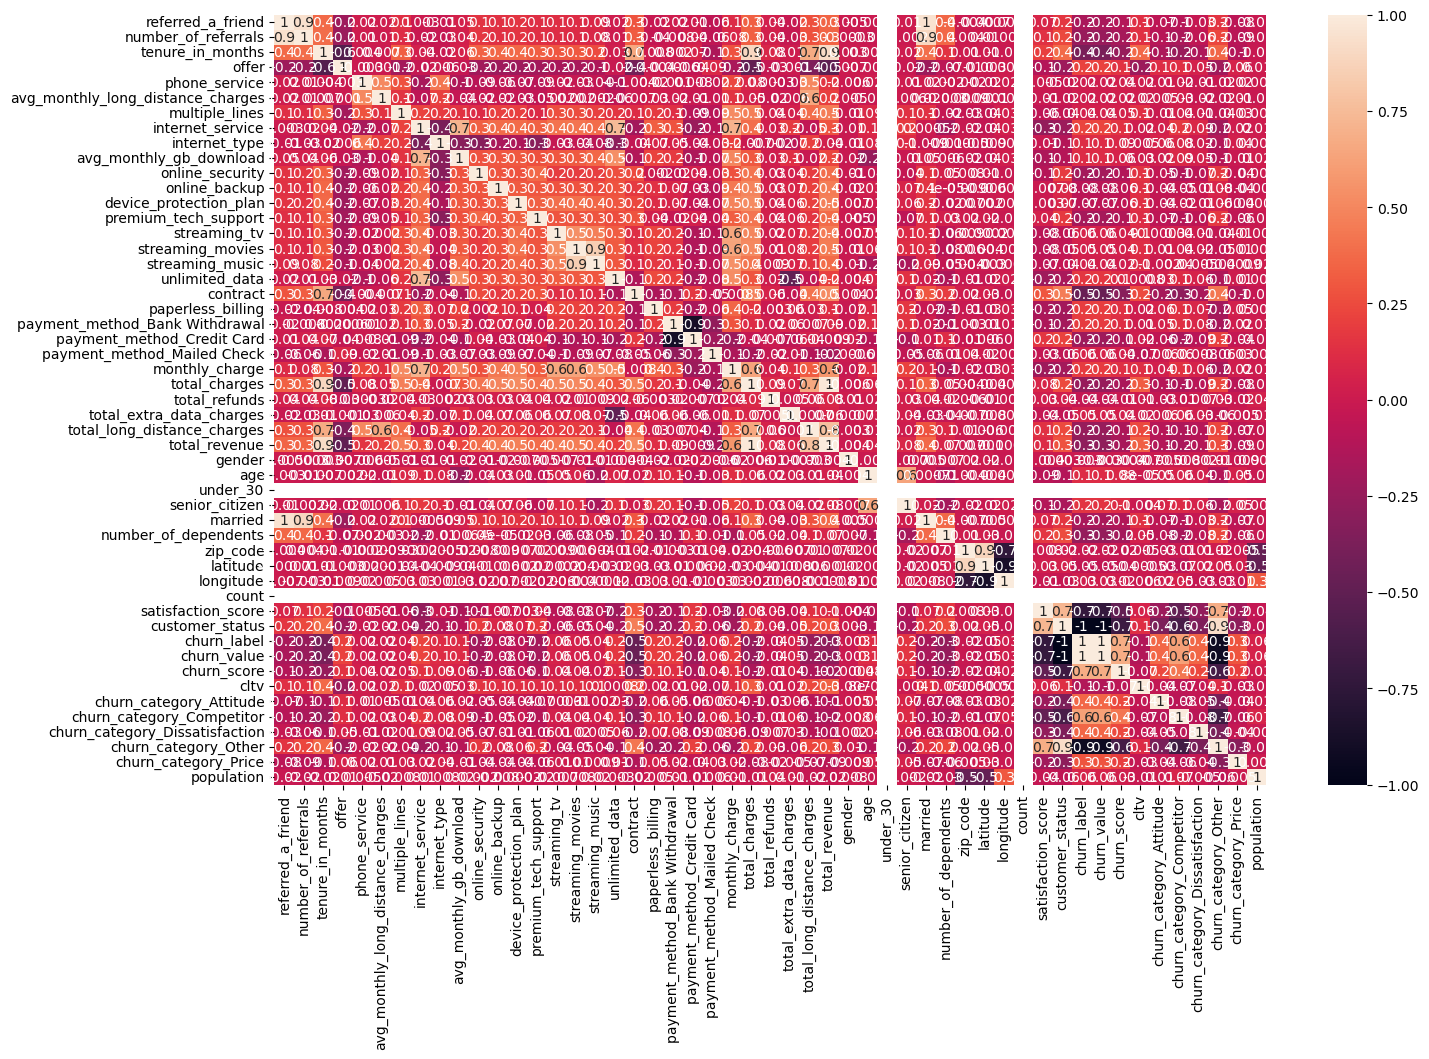

In [52]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [53]:
df_corr

,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,...,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
referred_a_friend,1.000000,0.943988,0.374506,-0.214721,0.019057,0.017114,0.130365,0.003075,-0.014778,0.051234,...,-0.158206,-0.158206,-0.115618,0.127490,-0.066692,-0.097121,-0.029188,0.151513,-0.077960,-0.015576
number_of_referrals,0.943988,1.000000,0.388776,-0.228460,0.014570,0.013244,0.114901,-0.016569,-0.026558,0.041796,...,-0.241571,-0.241571,-0.172605,0.137094,-0.096144,-0.150516,-0.062356,0.227472,-0.090436,-0.024451
tenure_in_months,0.374506,0.388776,1.000000,-0.566820,0.003643,0.007097,0.334013,0.043536,-0.020847,0.061740,...,-0.379275,-0.379275,-0.246603,0.371794,-0.141943,-0.228935,-0.136792,0.353176,-0.110270,-0.018656
offer,-0.214721,-0.228460,-0.566820,1.000000,-0.003298,0.001409,-0.185302,-0.023822,0.006459,-0.033100,...,0.210954,0.210954,0.147312,-0.221406,0.109553,0.130470,0.050159,-0.200184,0.058441,0.014369
phone_service,0.019057,0.014570,0.003643,-0.003298,1.000000,0.507557,0.277643,-0.168426,0.429360,-0.125051,...,0.022548,0.022548,0.038104,0.022369,0.011900,0.019441,-0.014198,-0.020455,0.016672,0.005317
avg_monthly_long_distance_charges,0.017114,0.013244,0.007097,0.001409,0.507557,1.000000,0.146938,-0.065165,0.209090,-0.037526,...,0.018170,0.018170,0.024237,0.020091,0.005266,0.031319,-0.017685,-0.023590,0.014029,-0.015866
multiple_lines,0.130365,0.114901,0.334013,-0.185302,0.277643,0.146938,1.000000,0.214210,0.180141,0.147804,...,0.040343,0.040343,0.045064,0.137733,-0.011605,0.041517,0.010763,-0.041377,0.025635,0.007901
internet_service,0.003075,-0.016569,0.043536,-0.023822,-0.168426,-0.065165,0.214210,1.000000,-0.378164,0.712985,...,0.223808,0.223808,0.144580,0.015940,0.044167,0.167564,0.091857,-0.199817,0.015867,0.012505
internet_type,-0.014778,-0.026558,-0.020847,0.006459,0.429360,0.209090,0.180141,-0.378164,1.000000,-0.307768,...,0.113595,0.113595,0.088848,0.004690,0.060530,0.078944,0.021321,-0.117369,0.043870,0.007981
avg_monthly_gb_download,0.051234,0.041796,0.061740,-0.033100,-0.125051,-0.037526,0.147804,0.712985,-0.307768,1.000000,...,0.104024,0.104024,0.062297,0.027239,0.021555,0.088352,0.053106,-0.097869,-0.014082,0.020374


<a class="anchor" id="1st-bullet">

# 2. Feature Engineering

### Droping variables based on correlaction, univalue variable and entire null variable

In [54]:
df = df.drop(['customer_id','under_30', 'count', 'quarter', 'lat_long',	'latitude',	'longitude', 'married', 'total_long_distance_charges', 'tenure_in_months', 'city', 'churn_reason','senior_citizen','referred_a_friend','customer_status','zip_code','churn_label'])
#ATENCAO AQUI o zip code saiu porque está como variavel numerica mas temos de usar alguma coisa para a geografia

In [55]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
i64,i32,i32,f64,i32,i32,i32,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,i64,f64,i32,i64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,i64
1,2,1,17.22,0,1,2,21,1,1,1,0,0,0,0,1,2,0,0,1,0,60.3,3563.8,0.0,0,4562.56,1,31,0,2.0,1,88,4026,0,0,1,0,0,29914
0,2,1,17.51,1,1,3,7,0,0,0,0,1,0,0,1,1,1,1,0,0,84.75,1350.15,0.0,0,1630.31,0,76,0,2.0,1,91,5136,1,0,0,0,0,51213
5,2,1,26.64,0,1,1,61,1,0,1,0,1,1,1,1,2,1,0,1,0,73.05,4688.65,0.0,0,6393.61,1,20,0,3.0,0,28,4515,0,0,0,1,0,1666
4,2,1,19.24,1,1,3,18,1,1,1,1,0,1,1,0,3,1,0,1,0,106.05,3834.4,0.0,1,4577.04,0,54,0,3.0,0,25,4505,0,0,0,1,0,72199
1,2,1,33.25,1,1,3,26,0,1,1,0,1,1,1,1,1,1,1,0,0,105.65,4284.8,0.0,0,5581.55,1,65,0,3.0,1,96,4687,1,0,0,0,0,32804
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,1,1,20.48,1,1,1,6,1,1,1,1,1,1,1,1,3,1,0,1,0,88.05,6425.65,0.0,0,7900.21,0,71,0,3.0,0,8,6102,0,0,0,1,0,55306
0,2,1,40.26,1,1,3,14,0,0,0,0,1,0,0,1,2,0,1,0,0,84.05,2781.85,0.0,0,4070.17,0,44,0,2.0,1,68,3553,0,0,0,1,0,36517
4,2,0,0.0,0,1,2,25,0,1,1,0,1,1,1,1,3,1,0,1,0,56.75,3708.4,0.0,0,3708.4,1,35,1,3.0,0,46,5748,0,0,0,1,0,68701


In [56]:
df.shape

(5634, 39)

In [57]:
df = df.drop(['churn_category_Other','churn_category_Competitor','churn_category_Dissatisfaction','churn_category_Attitude','churn_category_Price'])

Variance

In [58]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

def select_features_variance(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    # check which features to use using variance
    for var in numerical_columns:
        apply_variance(X[var], var)

select_features_variance(df)

number_of_referrals:6.590837337735683
offer:1.2637012253656348
phone_service:0.08581334661275808
avg_monthly_long_distance_charges:236.53855932608553
multiple_lines:0.24427231989895234
internet_service:0.16775834956553906
internet_type:0.7155494578104826
avg_monthly_gb_download:341.390944451593
online_security:0.20534855929429524
online_backup:0.22690215961383803
device_protection_plan:0.22668562538532513
premium_tech_support:0.20705817769306037
streaming_tv:0.23717833465388533
streaming_movies:0.23777528473526882
streaming_music:0.2290635001749802
unlimited_data:0.21972073512488186
contract:0.7182706301000689
paperless_billing:0.24085617104591406
payment_method_Bank Withdrawal:0.24713238667038986
payment_method_Credit Card:0.2378538067517717
payment_method_Mailed Check:0.053266663982045534
monthly_charge:897.9024207219029
total_charges:5219983.479264253
total_refunds:0.06794338045851547
total_extra_data_charges:0.0946123498494847
total_revenue:8324624.236603642
gender:0.25002468780094

Decision Tree

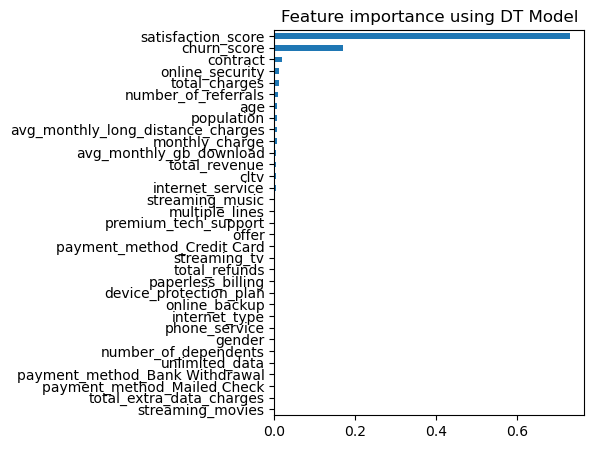

In [59]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

def select_best_features_dt(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis = 1)
    y = df_pd['churn_value'].copy()
    apply_dt(X, y)



select_best_features_dt(df)

In [60]:

df_temp = df.drop(['satisfaction_score','churn_score'])

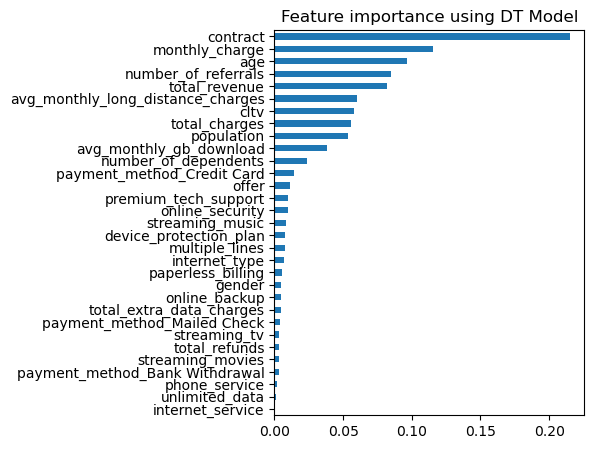

In [61]:
select_best_features_dt(df_temp)

##Title DT
number_of_referrals - YES
offer - YES
phone_service - NO
avg_monthly_long_distance_charges - YES
multiple_lines - NO
internet_service - NO
internet_type - NO
avg_monthly_gb_download - YES
online_security - NO
online_backup - NO
device_protection_plan - NO
premium_tech_support - YES
streaming_tv - NO
streaming_movies - NO
streaming_music - YES
unlimited_data - NO
contract - YES
paperless_billing - NO
payment_method_Bank Withdrawal - NO
payment_method_Credit Card - YES
payment_method_Mailed Check - NO
monthly_charge - YES
total_charges - YES
total_refunds - NO
total_extra_data_charges - NO
total_revenue - YES
gender - NO
age - YES
number_of_dependents - YES
satisfaction_score - NO
churn_value - NO
churn_score - NO
cltv - YES
population - YES

Wrapped Method

In [62]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE 

#def apply_rfe(X_train, y_train):
#    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
#    rfe.fit_transform(X = X_train, y = y_train)
#    selected_features = pd.Series(rfe.support_, index = X_train.columns)
#    print(selected_features)

#def select_best_features(X, y):
#    X_train=X
#    y_train=y
#    numerical_data = X_train.copy()
#    scaler = MinMaxScaler().fit(numerical_data)
#    X_train_scaled = scaler.transform(numerical_data)
#    X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)


#    print('------------------ RFE ----------------------')
#    apply_rfe(X_train, y_train)
#df_pd = df_temp.to_pandas()
#X = df_pd.drop('churn_value', axis = 1)
#y = df_pd['churn_value'].copy()

#select_best_features(X, y)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=8)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
dtype: bool


In [64]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
premium_tech_support           True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
dtype: bool


In [65]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=15)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)

------------------ RFE ----------------------
number_of_referrals            True
offer                          True
phone_service                  True
online_security                True
premium_tech_support           True
contract                       True
paperless_billing              True
payment_method_Credit Card     True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


In [66]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
premium_tech_support           True
contract                       True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
dtype: bool


<a class="anchor" id="1st-bullet">

3.1.5 Chisquare

In [67]:
def apply_chisquare(X, y, var, alpha=0.05):
    # Create contingency table
    dfObserved = pd.crosstab(y, X) 
    # Calculate Chi-square
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # Return True if we should keep it (p-value < alpha), else False
    if p < alpha:
        print(f"{var} KEEP (p-value: {p:.4f})")
        return True
    else:
        print(f"{var} DISCARD (p-value: {p:.4f})")
        return False

def select_best_cat_features(df_pd):
    # Separate Features and Target
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    
    selected_features = []
    
    # Iterate over ALL columns in X (since they are already encoded)
    for var in X.columns:
        # Optional: Skip columns that are continuous numbers (like 'TotalCharges' or 'Tenure')
        # if X[var].nunique() > 20: 
        #     continue
            
        if apply_chisquare(X[var], y, var):
            selected_features.append(var)
            
    return selected_features
    
    for var in X_train_cat:
        # If the function returns True, add to our list
        if apply_chisquare(X_train_cat[var], y, var):
            selected_features.append(var)
            
    return selected_features

# Now you can store the best features in a variable
best_features = select_best_cat_features(df_pd)
print("\nFinal Selected Features:", best_features)

number_of_referrals KEEP (p-value: 0.0000)
offer KEEP (p-value: 0.0000)
phone_service DISCARD (p-value: 0.1008)
avg_monthly_long_distance_charges DISCARD (p-value: 0.1804)
multiple_lines KEEP (p-value: 0.0027)
internet_service KEEP (p-value: 0.0000)
internet_type KEEP (p-value: 0.0000)
avg_monthly_gb_download KEEP (p-value: 0.0000)
online_security KEEP (p-value: 0.0000)
online_backup KEEP (p-value: 0.0000)
device_protection_plan KEEP (p-value: 0.0000)
premium_tech_support KEEP (p-value: 0.0000)
streaming_tv KEEP (p-value: 0.0000)
streaming_movies KEEP (p-value: 0.0001)
streaming_music KEEP (p-value: 0.0087)
unlimited_data KEEP (p-value: 0.0000)
contract KEEP (p-value: 0.0000)
paperless_billing KEEP (p-value: 0.0000)
payment_method_Bank Withdrawal KEEP (p-value: 0.0000)
payment_method_Credit Card KEEP (p-value: 0.0000)
payment_method_Mailed Check KEEP (p-value: 0.0000)
monthly_charge KEEP (p-value: 0.0000)
total_charges DISCARD (p-value: 0.5583)
total_refunds KEEP (p-value: 0.0043)
tota

Feature Selection Table
| Feature                          | Decision Tree | RFE-8 | RFE-10 | RFE-15 | Chi-Squared |
|----------------------------------|---------------|-------|--------|--------|-------------|
| number_of_referrals             | YES           | YES   | YES    | YES    | YES         |
| offer                           | YES           | NO    | NO     | NO     | YES         |
| phone_service                   | NO            | NO    | YES    | YES    | NO          |
| avg_monthly_long_distance_charges | YES         | NO    | NO     | NO     | NO          |
| multiple_lines                  | NO            | NO    | NO     | NO     | YES         |
| internet_service                | NO            | NO    | NO     | NO     | YES         |
| internet_type                   | NO            | NO    | NO     | NO     | YES         |
| avg_monthly_gb_download         | YES           | NO    | NO     | NO     | YES         |
| online_security                 | NO            | NO    | NO     | YES    | YES         |
| online_backup                   | NO            | NO    | NO     | YES    | YES         |
| device_protection_plan          | NO            | NO    | NO     | NO     | YES         |
| premium_tech_support            | YES           | NO    | NO     | YES    | YES         |
| streaming_tv                    | NO            | NO    | NO     | NO     | YES         |
| streaming_movies                | NO            | NO    | NO     | NO     | YES         |
| streaming_music                 | YES           | NO    | NO     | NO     | YES         |
| unlimited_data                  | NO            | NO    | NO     | NO     | YES         |
| contract                        | YES           | YES   | YES    | YES    | YES         |
| paperless_billing               | NO            | NO    | NO     | NO     | YES         |
| payment_method_Bank Withdrawal  | NO            | NO    | NO     | NO     | YES         |
| payment_method_Credit Card      | YES           | NO    | NO     | YES    | YES         |
| payment_method_Mailed Check     | NO            | YES   | YES    | YES    | YES         |
| monthly_charge                  | YES           | YES   | YES    | YES    | YES         |
| total_charges                   | YES           | YES   | YES    | YES    | NO          |
| total_refunds                   | NO            | YES   | YES    | YES    | YES         |
| total_extra_data_charges        | NO            | NO    | NO     | NO     | YES         |
| total_revenue                   | YES           | NO    | NO     | YES    | YES         |
| gender                          | NO            | NO    | NO     | NO     | NO          |
| age                             | YES           | YES   | YES    | YES    | YES         |
| number_of_dependents            | YES           | YES   | YES    | YES    | YES         |
| cltv                            | YES           | NO    | NO     | NO     | NO          |
| population                      | YES           | NO    | YES    | YES    | YES         |


In [68]:
df.write_parquet(train_model_path, compression='snappy')